# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [143]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')



In [144]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [145]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.1.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [146]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [147]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1          2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2          2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3          1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4          2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5          2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6          2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7          2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8          2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9          2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   
10         2  2023-01-01 00:53:01   2023-01-01 01:01:45              1.0   
11         1  2023-01-01 00:43:37   2023-01-01 01:17:18              4.0   
12         2  2023-01-01 00:34:44   2023-01-01 01:04:25              1.0   
13         2  2023-01-01 00:09:29   2023-01-01 00:29:23              2.0   
14         2  2023-01-01 00:33:53   2023-01-01 00:49:15              1.0   
15         2  2023-01-01 00:13:04   2023-01-01 00:22:10              1.0   
16         2  2023-01-01 00:45:11   2023-01-01 01:07:39              1.0   
17         1  2023-01-01 00:04:33   2023-01-01 00:19:22              1.0   
18         1  2023-01-01 00:03:36   2023-01-01 00:09:36              3.0   
19         1  2023-01-01 00:15:23   2023-01-01 00:29:41              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.97         1.0                  N           161           141   
1            1.10         1.0                  N            43           237   
2            2.51         1.0                  N            48           238   
3            1.90         1.0                  N           138             7   
4            1.43         1.0                  N           107            79   
5            1.84         1.0                  N           161           137   
6            1.66         1.0                  N           239           143   
7           11.70         1.0                  N           142           200   
8            2.95         1.0                  N           164           236   
9            3.01         1.0                  N           141           107   
10           1.80         1.0                  N           234            68   
11           7.30         1.0                  N            79           264   
12           3.23         1.0                  N           164           143   
13          11.43         1.0                  N           138            33   
14           2.95         1.0                  N            33            61   
15           1.52         1.0                  N            79           186   
16           2.23         1.0                  N            90            48   
17           4.50         1.0                  N           113           255   
18           1.20         1.0                  N           237           239   
19           2.50         1.0                  N           143           229   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2          9.3   1.00      0.5        0.00           0.0   
1              1          7.9   1.00      0.5        4.00           0.0   
2              1         14.9   1.00      0.5       15.00           0.0   
3              1         12.1   7.25      0.5        0.00           0.0   
4              1         11.4   1.00      0.5        3.28           0.0   
5              1         12.8   1.00      0.5       10.00           0.0   
6              1         12.1   1.00      0.5        3.42           0.0   
7              1         45.7   1.00      0.5       10.74           3.0   
8              1         17.7   1.00      0.5      

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [148]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

unique_dates = df['date'].unique()
print(unique_dates)

[datetime.date(2023, 1, 1) datetime.date(2022, 12, 31)
 datetime.date(2022, 10, 24) datetime.date(2022, 10, 25)
 datetime.date(2023, 1, 2) datetime.date(2023, 1, 3)
 datetime.date(2008, 12, 31) datetime.date(2023, 1, 4)
 datetime.date(2023, 1, 5) datetime.date(2023, 1, 6)
 datetime.date(2023, 1, 7) datetime.date(2023, 1, 8)
 datetime.date(2023, 1, 9) datetime.date(2023, 1, 10)
 datetime.date(2023, 1, 11) datetime.date(2023, 1, 12)
 datetime.date(2023, 1, 13) datetime.date(2023, 1, 14)
 datetime.date(2023, 1, 15) datetime.date(2023, 1, 16)
 datetime.date(2023, 1, 17) datetime.date(2023, 1, 18)
 datetime.date(2023, 1, 19) datetime.date(2023, 1, 20)
 datetime.date(2023, 1, 21) datetime.date(2023, 1, 22)
 datetime.date(2023, 1, 23) datetime.date(2023, 1, 24)
 datetime.date(2023, 1, 25) datetime.date(2023, 1, 26)
 datetime.date(2023, 1, 27) datetime.date(2023, 1, 28)
 datetime.date(2023, 1, 29) datetime.date(2023, 1, 30)
 datetime.date(2023, 1, 31) datetime.date(2023, 2, 1)]


In [150]:
month_df = pd.DataFrame()

# Iterate through each date
for each_date in unique_dates:
    #print(f"\nProcessing date: {each_date}")

    each_date_df = pd.DataFrame()
    
    # Iterate through each hour of the selected date
    for hour in range(24):  # Loop from 0 to 23
        # Filter data for the specific date and hour
        hour_data = df[(df['date'] == each_date) & (df['hour'] == hour)]
        
        # Print or process `hour_data`
        # print(f"  Hour {hour}: {len(hour_data)} records")
        
        # If you want to sample 5% of data for this hour
        sampled_data = hour_data.sample(frac=0.05, random_state=42) if not hour_data.empty else pd.DataFrame()
        
        # Append the sampled data to the `each_date_df`
        each_date_df = pd.concat([each_date_df, sampled_data])
        
        # Print or process `sampled_data`
        # print(f"    Sampled {len(sampled_data)} records")
        
    # Print or process `each_date_df` for the current date
    print(f"  Total records for date {each_date}: {len(each_date_df)}")

    # Append the sampled data for the current date to the `month_df`
    month_df = pd.concat([month_df, each_date_df])

print(f"  Total records for month: {len(month_df)}")


  Total records for date 2023-01-01: 3801
  Total records for date 2022-12-31: 1
  Total records for date 2022-10-24: 0
  Total records for date 2022-10-25: 0
  Total records for date 2023-01-02: 3253
  Total records for date 2023-01-03: 4251
  Total records for date 2008-12-31: 0
  Total records for date 2023-01-04: 4713
  Total records for date 2023-01-05: 5014
  Total records for date 2023-01-06: 5088
  Total records for date 2023-01-07: 5206
  Total records for date 2023-01-08: 4218
  Total records for date 2023-01-09: 4231
  Total records for date 2023-01-10: 4958
  Total records for date 2023-01-11: 5268
  Total records for date 2023-01-12: 5528
  Total records for date 2023-01-13: 5491
  Total records for date 2023-01-14: 5596
  Total records for date 2023-01-15: 4800
  Total records for date 2023-01-16: 3970
  Total records for date 2023-01-17: 5011
  Total records for date 2023-01-18: 5268
  Total records for date 2023-01-19: 5690
  Total records for date 2023-01-20: 5428
  To

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\\Users\\VIJAY RAJ KANNAN\\Desktop\\AI ML course\\NYC Taxi Records\\Starter Notebook - EDA NYC Taxi\\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

file_list

['2023-1.parquet',
 '2023-10.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet']

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\\Users\\VIJAY RAJ KANNAN\\Desktop\\AI ML course\\NYC Taxi Records\\Starter Notebook - EDA NYC Taxi\\trip_records")
# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_df = pd.read_parquet(file_path)
        current_df['date'] = current_df['tpep_pickup_datetime'].dt.date
        current_df['hour'] = current_df['tpep_pickup_datetime'].dt.hour
        unique_dates = current_df['date'].unique()
        print(f"  Total records for month : {len(current_df)}")

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for each_date in unique_dates:
            #print(f"\nProcessing date: {each_date}")
            each_date_df = pd.DataFrame()

            # Iterate through each hour of the selected date
            for hour in range(24):  # Loop from 0 to 23
                # Filter data for the specific date and hour
                hour_data = current_df[(current_df['date'] == each_date) & (current_df['hour'] == hour)]

                # Print or process `hour_data`
                # print(f"  Hour {hour}: {len(hour_data)} records")

                # Sample 1% of the hourly data randomly
                sampled_hour_data = hour_data.sample(frac=0.01, random_state=42) if not hour_data.empty else pd.DataFrame()

                # add data of this hour to the dataframe
                each_date_df = pd.concat([each_date_df, sampled_hour_data])

                # Print or process `sampled_hour_data`
                # print(f"    Sampled {len(sampled_hour_data)} records")

            # Print or process `each_date_df` for the current date 
            #print(f"  Total records for date {each_date}: {len(each_date_df)}")

            # Append the sampled data for the current date to the `month_df`
            sampled_data = pd.concat([sampled_data, each_date_df])

        # Print or process `sampled_data` for the current month
        print(f"  Total sampled records for month : {len(sampled_data)}")

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Print or process `df` for the entire year
print(f"  Total sampled records for year: {len(df)}")

  Total records for month : 3041714
  Total sampled records for month : 30416
  Total records for month : 3485185
  Total sampled records for month : 34854
  Total records for month : 3302857
  Total sampled records for month : 33032
  Total records for month : 3333925
  Total sampled records for month : 33330
  Total records for month : 3374086
  Total sampled records for month : 33722
  Total records for month : 3275796
  Total sampled records for month : 32745
  Total records for month : 2792901
  Total sampled records for month : 27936
  Total records for month : 2889185
  Total sampled records for month : 28886
  Total records for month : 3258261
  Total sampled records for month : 32584
  Total records for month : 3481547
  Total sampled records for month : 34816
  Total records for month : 2875947
  Total sampled records for month : 28759
  Total records for month : 2817156
  Total sampled records for month : 28188
  Total sampled records for year: 379268


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_csv('2023_1percent.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new data file
df = pd.read_csv('trip_records/2023_1percent.csv')


In [245]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0         428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1        1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2         819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3        3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4     2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN                NaN   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             379268 non-null  int64  
 1   VendorID               379268 non-null  int64  
 2   tpep_pickup_datetime   379268 non-null  object 
 3   tpep_dropoff_datetime  379268 non-null  object 
 4   passenger_count        366326 non-null  float64
 5   trip_distance          379268 non-null  float64
 6   RatecodeID             366326 non-null  float64
 7   store_and_fwd_flag     366326 non-null  object 
 8   PULocationID           379268 non-null  int64  
 9   DOLocationID           379268 non-null  int64  
 10  payment_type           379268 non-null  int64  
 11  fare_amount            379268 non-null  float64
 12  extra                  379268 non-null  float64
 13  mta_tax                379268 non-null  float64
 14  tip_amount             379268 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [247]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4          2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   
...            ...       ...                  ...                   ...   
379263     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
379264     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
379265     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
379266     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
379267     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
4                   NaN          19.24         NaN                NaN   
...                 ...            ...         ...                ...   
379263              1.0           1.10         1.0                  N   
379264              2.0           3.36         1.0                  N   
379265              3.0           4.97         1.0                  N   
379266              4.0           2.34         1.0                  N   
379267              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                138           256  ...      0.5        0.00          0.00   
1                161           237  ...      0.5        2.58          0.00   
2                237           141  ...      0.5        0.00          0.00   
3                143           142  ...      0.5        0.00          0.00   
4                 66           107  ...      0.5        5.93          0.00   
...              ...           ...  ...      ...         ...           ...   
379263           186           249  ...      0.5        1.00          0.00   
379264            79           163  ...      0.5        0.00          0.00   
379265           234           112  ...      0.5        5.00          6.94   
379266           148           170  ...      0.5        0.00          0.00   
379267           141           263  ...      0.5        3.20          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
379263                    1.0         15.30                   2.5   
379264                    1.0         29.70                   2.5   
379265                    1.0         43.74                   2.5   
379266                    1.0         20.60                   2.5   
379267                    1.0         16.10                   2.5   

        airport_fee        date  hour  Airport_fee  
0              1.25  2023-01-01     0          NaN  
1              0.00  2023-01-01     0          NaN  
2              0.00  2023-01-01     0          NaN  
3              0.00  2023-01-01     0          NaN  
4               NaN  2023-01-01     0          NaN  
...             ...         ...   ...          ...  
379263          NaN  2023-09-30    23          0.0  
379264          NaN  2023-09-30    23   

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [248]:
# Combine the two airport fee columns
df['airport_fee'] = df[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)
df.drop(columns=['Airport_fee'], inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             379268 non-null  int64  
 1   VendorID               379268 non-null  int64  
 2   tpep_pickup_datetime   379268 non-null  object 
 3   tpep_dropoff_datetime  379268 non-null  object 
 4   passenger_count        366326 non-null  float64
 5   trip_distance          379268 non-null  float64
 6   RatecodeID             366326 non-null  float64
 7   store_and_fwd_flag     366326 non-null  object 
 8   PULocationID           379268 non-null  int64  
 9   DOLocationID           379268 non-null  int64  
 10  payment_type           379268 non-null  int64  
 11  fare_amount            379268 non-null  float64
 12  extra                  379268 non-null  float64
 13  mta_tax                379268 non-null  float64
 14  tip_amount             379268 non-nu

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [249]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
len(negative_fares)


0

Did you notice something different in the `RatecodeID` column for above records?

In [250]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].value_counts()


RatecodeID
1.0     345900
2.0      14327
99.0      2133
5.0       2066
3.0       1176
4.0        724
Name: count, dtype: int64

In [251]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=['number'])
negative_columns = numeric_df.loc[:, (numeric_df < 0).any()]
list(negative_columns.columns)


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [252]:
# fix these negative values
# 'extra' -- 1,
# 'mta_tax' -- 15,
# 'improvement_surcharge -- 15',
# 'total_amount -- 15',
# 'congestion_surcharge -- 10',
# 'airport_fee' -- 3

negative_counts = (numeric_df < 0).sum()
print(negative_counts[negative_counts > 0])

negative_rows =  df[(df[numeric_df.columns] < 0).any(axis=1)]
print(negative_rows.shape)

#Drop rows with negative values
print("Before dropping negative values",df.shape)
df = df.drop(negative_rows.index)
print("After dropping negative values",df.shape)

#Reset index
df.reset_index(drop=True, inplace=True)
df.info()

extra                     1
mta_tax                  15
improvement_surcharge    15
total_amount             15
congestion_surcharge     10
airport_fee               3
dtype: int64
(16, 22)
Before dropping negative values (379268, 22)
After dropping negative values (379252, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379252 entries, 0 to 379251
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             379252 non-null  int64  
 1   VendorID               379252 non-null  int64  
 2   tpep_pickup_datetime   379252 non-null  object 
 3   tpep_dropoff_datetime  379252 non-null  object 
 4   passenger_count        366310 non-null  float64
 5   trip_distance          379252 non-null  float64
 6   RatecodeID             366310 non-null  float64
 7   store_and_fwd_flag     366310 non-null  object 
 8   PULocationID           379252 non-null  int64  
 9   DOLocationID          

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [253]:
#looking at below see a pattern for 4 columns missing
df.isnull().sum()

Unnamed: 0                   0
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
airport_fee                  0
date                         0
hour                         0
dtype: int64

In [254]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()
print(missing_proportion * 100)

Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.412507
trip_distance            0.000000
RatecodeID               3.412507
store_and_fwd_flag       3.412507
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.412507
airport_fee              0.000000
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [255]:
# Display the rows with null values                              
null_rows  = df[df.isnull().any(axis=1)]
null_rows

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
4          2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   
15         2995167         2  2023-01-01 00:41:50   2023-01-01 01:14:50   
42         2995165         2  2023-01-01 00:37:21   2023-01-01 00:54:18   
43         2995317         2  2023-01-01 00:44:03   2023-01-01 01:13:49   
46         2995090         2  2023-01-01 00:50:55   2023-01-01 01:19:06   
...            ...       ...                  ...                   ...   
379130     2846107         1  2023-09-30 22:53:15   2023-09-30 23:10:04   
379190     2846509         2  2023-09-30 23:27:39   2023-09-30 23:43:22   
379209     2846616         1  2023-09-30 23:12:36   2023-09-30 23:36:35   
379226     2846281         1  2023-09-30 23:31:35   2023-09-30 23:41:26   
379239     2846347         1  2023-09-30 23:38:37   2023-09-30 23:46:08   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
4                   NaN          19.24         NaN                NaN   
15                  NaN          10.77         NaN                NaN   
42                  NaN           4.52         NaN                NaN   
43                  NaN           9.19         NaN                NaN   
46                  NaN           2.74         NaN                NaN   
...                 ...            ...         ...                ...   
379130              NaN           0.00         NaN                NaN   
379190              NaN           3.01         NaN                NaN   
379209              NaN           0.00         NaN                NaN   
379226              NaN           0.00         NaN                NaN   
379239              NaN           0.00         NaN                NaN   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
4                 66           107  ...    0.0      0.5        5.93   
15               151           106  ...    0.0      0.5       11.19   
42               114           262  ...    0.0      0.5        0.00   
43               239           256  ...    0.0      0.5        2.20   
46                90            48  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
379130            48           249  ...    0.0      0.5        0.00   
379190           163           262  ...    0.0      0.5        5.25   
379209           161            87  ...    0.0      0.5        0.00   
379226           249           231  ...    0.0      0.5        0.00   
379239           231           249  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379130          0.00                    1.0         25.88   
379190          0.00                    1.0         31.50   
379209          0.00                    1.0         35.01   
379226          0.00                    1.0         24.65   
379239          0.00                    1.0         16.33   

        congestion_surcharge  airport_fee        date  hour  
4                        NaN          0.0  2023-01-01     0  
15                       NaN          0.0  2023-01-01     0  
42                       NaN          0.0  2023-01-01     0  
43                       NaN          0.0  2023-01-01     0  
46                       NaN          0.0  2023-01-01     0  
...                      ...          ...         ...   ...  
379130                   NaN          0.0  2023-09-30    22  
379190                   NaN          0.0  2023-09-30    23  
379209                   NaN          0.0  2023-09-30    23  
379226                  

In [256]:

# Impute NaN values in 'passenger_count'
#df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

#Removing the rows with null values in below columns
    #passenger_count
    #RatecodeID
    #store_and_fwd_flag
    #congestion_surcharge

df_without_null = df.dropna()
df_without_null


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
379247     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
379248     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
379249     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
379250     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
379251     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
5                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
379247              1.0           1.10         1.0                  N   
379248              2.0           3.36         1.0                  N   
379249              3.0           4.97         1.0                  N   
379250              4.0           2.34         1.0                  N   
379251              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0                138           256  ...    6.0      0.5        0.00   
1                161           237  ...    1.0      0.5        2.58   
2                237           141  ...    1.0      0.5        0.00   
3                143           142  ...    1.0      0.5        0.00   
5                246            37  ...    3.5      0.5        7.90   
...              ...           ...  ...    ...      ...         ...   
379247           186           249  ...    3.5      0.5        1.00   
379248            79           163  ...    1.0      0.5        0.00   
379249           234           112  ...    1.0      0.5        5.00   
379250           148           170  ...    1.0      0.5        0.00   
379251           141           263  ...    3.5      0.5        3.20   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         41.15   
1               0.00                    1.0         15.48   
2               0.00                    1.0         16.40   
3               0.00                    1.0         11.50   
5               0.00                    1.0         47.40   
...              ...                    ...           ...   
379247          0.00                    1.0         15.30   
379248          0.00                    1.0         29.70   
379249          6.94                    1.0         43.74   
379250          0.00                    1.0         20.60   
379251          0.00                    1.0         16.10   

        congestion_surcharge  airport_fee        date  hour  
0                        0.0         1.25  2023-01-01     0  
1                        2.5         0.00  2023-01-01     0  
2                        2.5         0.00  2023-01-01     0  
3                        2.5         0.00  2023-01-01     0  
5                        2.5         0.00  2023-01-01     0  
...                      ...          ...         ...   ...  
379247                   2.5         0.00  2023-09-30    23  
379248                   2.5         0.00  2023-09-30    23  
379249                   2.5         0.00  2023-09-30    23  
379250                  

Did you find zeroes in passenger_count? Handle these.

In [257]:
df_without_null['passenger_count'].value_counts()
# No rows with passenger_count 0 found

passenger_count
1.0    276096
2.0     55131
3.0     13712
4.0      7613
0.0      5824
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [258]:
# Removing rows with passenger_count 0 in place
print('Before removing rows with passenger_count = 0',df_without_null.shape)
df_without_null = df_without_null[df_without_null['passenger_count'] != 0]
print('After removing rows with passenger_count = 0',df_without_null.shape)

Before removing rows with passenger_count = 0 (366310, 22)
After removing rows with passenger_count = 0 (360486, 22)


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [259]:
# Fix missing values in 'RatecodeID'
print(df_without_null['RatecodeID'].value_counts())

RatecodeID
1.0     340290
2.0      14162
99.0      2128
5.0       2026
3.0       1162
4.0        718
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [260]:
# handle null values in congestion_surcharge
# No null values in congestion_surcharge as null rows were cleaned up considering loss of only 3.4% data
df_without_null['congestion_surcharge'].value_counts()



congestion_surcharge
2.5    332904
0.0     27582
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [261]:
# Handle any remaining missing values
df_without_null.isnull().sum()


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [262]:
# Describe the data and check if there are any potential outliers present
df_without_null.describe()
# Check for potential out of place values in various columns



Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  3.604860e+05  360486.000000    360486.000000  360486.000000   
mean   1.550805e+06       1.749233         1.389277       3.498561   
std    9.059972e+05       0.433455         0.880744      23.232802   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.703902e+05       1.000000         1.000000       1.060000   
50%    1.541127e+06       2.000000         1.000000       1.790000   
75%    2.311746e+06       2.000000         1.000000       3.360000   
max    3.411775e+06       2.000000         9.000000    9678.780000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  360486.000000  360486.000000  360486.000000  360486.000000   
mean        1.652697     165.381724     164.214608       1.203686   
std         7.511854      63.712350      69.742837       0.464780   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  360486.000000  360486.000000  360486.000000  360486.000000   
mean       20.142660       1.606678       0.495436       3.577469   
std       239.115615       1.821197       0.048013       4.046778   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.860000   
75%        21.900000       2.500000       0.500000       4.450000   
max    143163.450000      14.250000       4.000000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  360486.000000          360486.000000  360486.000000   
mean        0.592757               0.999347      29.267858   
std         2.179106               0.023749     239.502690   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.700000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    airport_fee           hour  
count         360486.000000  360486.000000  360486.000000  
mean               2.308717       0.142768      14.304292  
std                0.664545       0.464495       5.781182  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [263]:
# remove passenger_count > 6
print("Passenger_count > 6:: ", (df_without_null['passenger_count'] > 6).sum())
df_filtered = df_without_null[~(df_without_null['passenger_count'] > 6)]
df_filtered


Passenger_count > 6::  5


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
379247     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
379248     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
379249     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
379250     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
379251     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
5                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
379247              1.0           1.10         1.0                  N   
379248              2.0           3.36         1.0                  N   
379249              3.0           4.97         1.0                  N   
379250              4.0           2.34         1.0                  N   
379251              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0                138           256  ...    6.0      0.5        0.00   
1                161           237  ...    1.0      0.5        2.58   
2                237           141  ...    1.0      0.5        0.00   
3                143           142  ...    1.0      0.5        0.00   
5                246            37  ...    3.5      0.5        7.90   
...              ...           ...  ...    ...      ...         ...   
379247           186           249  ...    3.5      0.5        1.00   
379248            79           163  ...    1.0      0.5        0.00   
379249           234           112  ...    1.0      0.5        5.00   
379250           148           170  ...    1.0      0.5        0.00   
379251           141           263  ...    3.5      0.5        3.20   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         41.15   
1               0.00                    1.0         15.48   
2               0.00                    1.0         16.40   
3               0.00                    1.0         11.50   
5               0.00                    1.0         47.40   
...              ...                    ...           ...   
379247          0.00                    1.0         15.30   
379248          0.00                    1.0         29.70   
379249          6.94                    1.0         43.74   
379250          0.00                    1.0         20.60   
379251          0.00                    1.0         16.10   

        congestion_surcharge  airport_fee        date  hour  
0                        0.0         1.25  2023-01-01     0  
1                        2.5         0.00  2023-01-01     0  
2                        2.5         0.00  2023-01-01     0  
3                        2.5         0.00  2023-01-01     0  
5                        2.5         0.00  2023-01-01     0  
...                      ...          ...         ...   ...  
379247                   2.5         0.00  2023-09-30    23  
379248                   2.5         0.00  2023-09-30    23  
379249                   2.5         0.00  2023-09-30    23  
379250                  

In [264]:
# Continue with outlier handling
#(df_filtered['trip_distance'] > 250).sum()
# df_filtered[df_filtered['trip_distance'] > 250]

#Removing trip_distance > 250 outlier
df_filtered = df_filtered[~(df_filtered['trip_distance'] > 250)]
df_filtered


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
379247     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
379248     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
379249     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
379250     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
379251     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
5                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
379247              1.0           1.10         1.0                  N   
379248              2.0           3.36         1.0                  N   
379249              3.0           4.97         1.0                  N   
379250              4.0           2.34         1.0                  N   
379251              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0                138           256  ...    6.0      0.5        0.00   
1                161           237  ...    1.0      0.5        2.58   
2                237           141  ...    1.0      0.5        0.00   
3                143           142  ...    1.0      0.5        0.00   
5                246            37  ...    3.5      0.5        7.90   
...              ...           ...  ...    ...      ...         ...   
379247           186           249  ...    3.5      0.5        1.00   
379248            79           163  ...    1.0      0.5        0.00   
379249           234           112  ...    1.0      0.5        5.00   
379250           148           170  ...    1.0      0.5        0.00   
379251           141           263  ...    3.5      0.5        3.20   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         41.15   
1               0.00                    1.0         15.48   
2               0.00                    1.0         16.40   
3               0.00                    1.0         11.50   
5               0.00                    1.0         47.40   
...              ...                    ...           ...   
379247          0.00                    1.0         15.30   
379248          0.00                    1.0         29.70   
379249          6.94                    1.0         43.74   
379250          0.00                    1.0         20.60   
379251          0.00                    1.0         16.10   

        congestion_surcharge  airport_fee        date  hour  
0                        0.0         1.25  2023-01-01     0  
1                        2.5         0.00  2023-01-01     0  
2                        2.5         0.00  2023-01-01     0  
3                        2.5         0.00  2023-01-01     0  
5                        2.5         0.00  2023-01-01     0  
...                      ...          ...         ...   ...  
379247                   2.5         0.00  2023-09-30    23  
379248                   2.5         0.00  2023-09-30    23  
379249                   2.5         0.00  2023-09-30    23  
379250                  

In [265]:
df_filtered.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  3.604790e+05  360479.000000    360479.000000  360479.000000   
mean   1.550801e+06       1.749228         1.389190       3.444808   
std    9.059945e+05       0.433458         0.880424       4.544444   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.703825e+05       1.000000         1.000000       1.060000   
50%    1.541121e+06       2.000000         1.000000       1.790000   
75%    2.311746e+06       2.000000         1.000000       3.360000   
max    3.411775e+06       2.000000         6.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  360479.000000  360479.000000  360479.000000  360479.000000   
mean        1.652654     165.382150     164.214886       1.203687   
std         7.511916      63.712305      69.742298       0.464782   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  360479.000000  360479.000000  360479.000000  360479.000000   
mean       20.141716       1.606709       0.495438       3.577442   
std       239.117813       1.821201       0.048000       4.046717   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.860000   
75%        21.900000       2.500000       0.500000       4.450000   
max    143163.450000      14.250000       4.000000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  360479.000000          360479.000000  360479.000000   
mean        0.592620               0.999347      29.266798   
std         2.178633               0.023750     239.504848   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.700000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    airport_fee           hour  
count         360479.000000  360479.000000  360479.000000  
mean               2.308741       0.142771      14.304373  
std                0.664507       0.464499       5.781143  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [266]:
df_filtered['total_amount'].nlargest(10)

354463    143167.45
234266       911.00
260986       601.00
357066       535.75
163543       530.06
351520       516.69
187831       501.00
244494       488.70
41977        473.58
107437       449.98
Name: total_amount, dtype: float64

In [267]:
# Continue with outlier handling

#Cleaning Entries where `trip_distance` is > 200 and `total_amount` is less
df_filtered = df_filtered[~(df_filtered["trip_distance"] > 200)]

#Cleaning Entries where `total_amount` is > 1000
df_filtered = df_filtered[~(df_filtered["total_amount"] > 1000)]

#sns.boxplot(y=df_filtered["trip_distance"])

#Cleaning Entries where `trip_distance` is 0 and `fare_amount` is more than 0
df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) & (df_filtered['fare_amount'] > 0)) ]
#temp_df[['trip_distance','fare_amount']] 

#Cleaning Entries where `trip_distance` is 0 and `fare_amount` is 0 but PULocationID & DOLocationID are not matching
df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) & (df_filtered['fare_amount'] == 0) & (df_filtered['PULocationID'] != df_filtered['DOLocationID'] )) ]
#df_filtered[['trip_distance','fare_amount','PULocationID','DOLocationID']]

#Cleaning Entries where `RatecodeID` is 99 as there is no 99 in data dictionary
df_filtered = df_filtered[~(df_filtered['RatecodeID'] == 99) ]

df_filtered


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
379247     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
379248     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
379249     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
379250     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
379251     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
5                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
379247              1.0           1.10         1.0                  N   
379248              2.0           3.36         1.0                  N   
379249              3.0           4.97         1.0                  N   
379250              4.0           2.34         1.0                  N   
379251              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0                138           256  ...    6.0      0.5        0.00   
1                161           237  ...    1.0      0.5        2.58   
2                237           141  ...    1.0      0.5        0.00   
3                143           142  ...    1.0      0.5        0.00   
5                246            37  ...    3.5      0.5        7.90   
...              ...           ...  ...    ...      ...         ...   
379247           186           249  ...    3.5      0.5        1.00   
379248            79           163  ...    1.0      0.5        0.00   
379249           234           112  ...    1.0      0.5        5.00   
379250           148           170  ...    1.0      0.5        0.00   
379251           141           263  ...    3.5      0.5        3.20   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         41.15   
1               0.00                    1.0         15.48   
2               0.00                    1.0         16.40   
3               0.00                    1.0         11.50   
5               0.00                    1.0         47.40   
...              ...                    ...           ...   
379247          0.00                    1.0         15.30   
379248          0.00                    1.0         29.70   
379249          6.94                    1.0         43.74   
379250          0.00                    1.0         20.60   
379251          0.00                    1.0         16.10   

        congestion_surcharge  airport_fee        date  hour  
0                        0.0         1.25  2023-01-01     0  
1                        2.5         0.00  2023-01-01     0  
2                        2.5         0.00  2023-01-01     0  
3                        2.5         0.00  2023-01-01     0  
5                        2.5         0.00  2023-01-01     0  
...                      ...          ...         ...   ...  
379247                   2.5         0.00  2023-09-30    23  
379248                   2.5         0.00  2023-09-30    23  
379249                   2.5         0.00  2023-09-30    23  
379250                  

In [268]:
df_filtered.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  3.542310e+05  354231.000000    354231.000000  354231.000000   
mean   1.550607e+06       1.754372         1.391801       3.465485   
std    9.058572e+05       0.430459         0.883194       4.540034   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.701965e+05       2.000000         1.000000       1.080000   
50%    1.540957e+06       2.000000         1.000000       1.800000   
75%    2.311478e+06       2.000000         1.000000       3.380000   
max    3.411775e+06       2.000000         6.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  354231.000000  354231.000000  354231.000000  354231.000000   
mean        1.061985     165.602564     164.354153       1.199616   
std         0.329839      63.501616      69.631696       0.456130   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  354231.000000  354231.000000  354231.000000  354231.000000   
mean       19.538860       1.624677       0.496833       3.600172   
std        17.796362       1.823851       0.040227       3.995069   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.880000   
75%        21.900000       2.500000       0.500000       4.480000   
max       519.600000      14.250000       4.000000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  354231.000000          354231.000000  354231.000000   
mean        0.585506               0.999572      28.719350   
std         2.147495               0.018481      22.492349   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.590000   
max        86.000000               1.000000     535.750000   

       congestion_surcharge    airport_fee           hour  
count         354231.000000  354231.000000  354231.000000  
mean               2.335489       0.143478      14.333915  
std                0.619851       0.465525       5.779662  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [269]:
# Do any columns need standardising?
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
354226     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
354227     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
354228     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
354229     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
354230     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
4                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
354226              1.0           1.10         1.0                  N   
354227              2.0           3.36         1.0                  N   
354228              3.0           4.97         1.0                  N   
354229              4.0           2.34         1.0                  N   
354230              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
0                138           256  ...    6.0      0.5        0.00   
1                161           237  ...    1.0      0.5        2.58   
2                237           141  ...    1.0      0.5        0.00   
3                143           142  ...    1.0      0.5        0.00   
4                246            37  ...    3.5      0.5        7.90   
...              ...           ...  ...    ...      ...         ...   
354226           186           249  ...    3.5      0.5        1.00   
354227            79           163  ...    1.0      0.5        0.00   
354228           234           112  ...    1.0      0.5        5.00   
354229           148           170  ...    1.0      0.5        0.00   
354230           141           263  ...    3.5      0.5        3.20   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         41.15   
1               0.00                    1.0         15.48   
2               0.00                    1.0         16.40   
3               0.00                    1.0         11.50   
4               0.00                    1.0         47.40   
...              ...                    ...           ...   
354226          0.00                    1.0         15.30   
354227          0.00                    1.0         29.70   
354228          6.94                    1.0         43.74   
354229          0.00                    1.0         20.60   
354230          0.00                    1.0         16.10   

        congestion_surcharge  airport_fee        date  hour  
0                        0.0         1.25  2023-01-01     0  
1                        2.5         0.00  2023-01-01     0  
2                        2.5         0.00  2023-01-01     0  
3                        2.5         0.00  2023-01-01     0  
4                        2.5         0.00  2023-01-01     0  
...                      ...          ...         ...   ...  
354226                   2.5         0.00  2023-09-30    23  
354227                   2.5         0.00  2023-09-30    23  
354228                   2.5         0.00  2023-09-30    23  
354229                  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [270]:
df_filtered.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: DateTime
* `tpep_dropoff_datetime`: DateTime
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

#Below monetary parameters belong to <font color = red>NUMERICAL </font>

* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

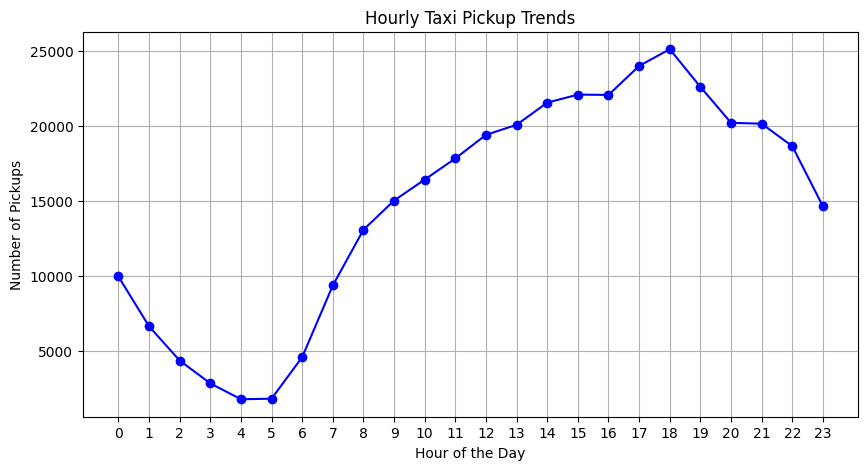

In [272]:
# Find and show the hourly trends in taxi pickups
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Extract hour from datetime
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

# Count pickups per hour
hourly_trends = df_filtered.groupby('pickup_hour').size()

# Plot the trends
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Taxi Pickup Trends")
plt.xticks(range(0, 24))  # Ensure all 24 hours are labeled
plt.grid(True)

# Show the plot
plt.show()


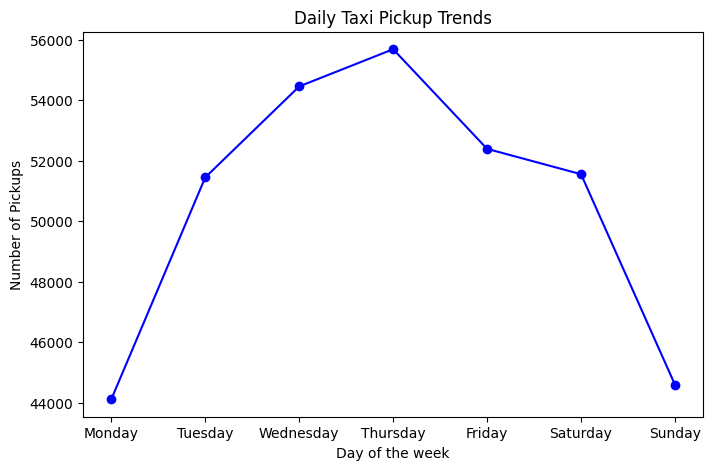

In [273]:
# Find and show the daily trends in taxi pickups (days of the week)
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Extract hour from datetime
df_filtered['pickup_day'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek
day_mapping = { 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_filtered['pickup_day'] = df_filtered['pickup_day'].map(day_mapping)

# Count pickups per hour
daily_trends = df_filtered['pickup_day'].value_counts().reindex(day_mapping.values())  # Ensure correct order

# Plot the trends
plt.figure(figsize=(8, 5))
plt.plot(daily_trends.index, daily_trends.values, marker='o', linestyle='-', color='b')


# Customize the plot
plt.xlabel("Day of the week")
plt.ylabel("Number of Pickups")
plt.title("Daily Taxi Pickup Trends")

# Show the plot
plt.show()



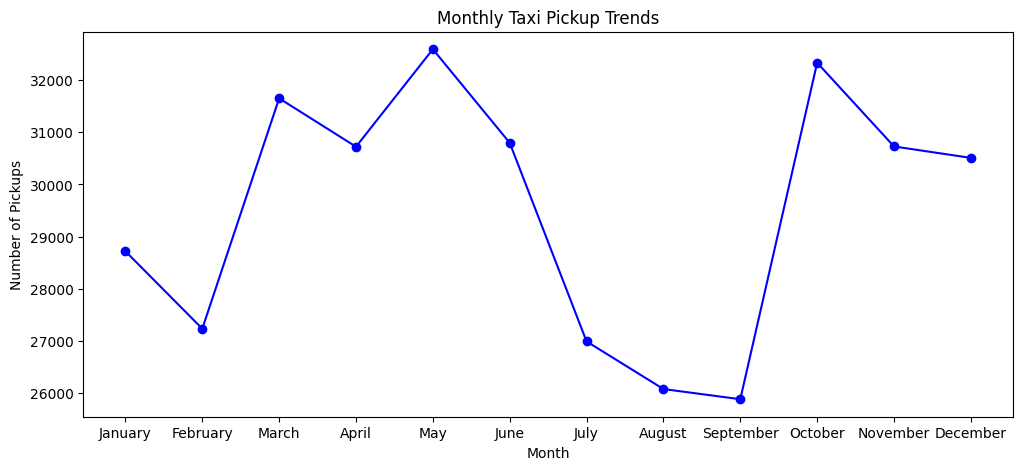

In [274]:
# Show the monthly trends in pickups

df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Extract the month
df_filtered['pickup_month'] = df_filtered['tpep_pickup_datetime'].dt.month  

# Define month mapping
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df_filtered['pickup_month'] = df_filtered['pickup_month'].map(month_mapping)

# Count pickups per month
monthly_trends = df_filtered['pickup_month'].value_counts().reindex(month_mapping.values())  # Ensure correct order

# Plot the trends
plt.figure(figsize=(12, 5))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Taxi Pickup Trends")


# Show the plot
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [275]:
# Analyse the above parameters
print(df_filtered['trip_distance'].nsmallest(5))
print(df_filtered['fare_amount'].nsmallest(5))

print(df_filtered['total_amount'].nsmallest(5))

print(df_filtered['tip_amount'].nsmallest(5))


563      0.0
10198    0.0
12521    0.0
19665    0.0
20587    0.0
Name: trip_distance, dtype: float64
563      0.0
8957     0.0
10198    0.0
11639    0.0
12521    0.0
Name: fare_amount, dtype: float64
563      0.0
10198    0.0
12521    0.0
19665    0.0
20587    0.0
Name: total_amount, dtype: float64
0     0.0
2     0.0
3     0.0
9     0.0
14    0.0
Name: tip_amount, dtype: float64


In [276]:
zero_values = (df_filtered[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0).sum()
print("Count of Zero values:")
print(zero_values)

negative_values = (df_filtered[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] < 0).sum()
print("Count of Negative values:")
print(negative_values)

Count of Zero values:
fare_amount         96
tip_amount       75613
total_amount        44
trip_distance       41
dtype: int64
Count of Negative values:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [277]:
# Create a df with non zero entries for the selected parameters.
df_filtered = df_filtered[
    (df_filtered['fare_amount'] > 0) & 
    (df_filtered['total_amount'] > 0) & 
    ~((df_filtered['trip_distance'] == 0) & (df_filtered['PULocationID'] != df_filtered['DOLocationID']))
]

print('After removing rows with zero entries:',df_filtered.shape)

# Resetting the index as few rows were deleted.
df_filtered.reset_index(drop=True, inplace=True)

print(df_filtered.info())


After removing rows with zero entries: (354135, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354135 entries, 0 to 354134
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             354135 non-null  int64         
 1   VendorID               354135 non-null  int64         
 2   tpep_pickup_datetime   354135 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  354135 non-null  object        
 4   passenger_count        354135 non-null  float64       
 5   trip_distance          354135 non-null  float64       
 6   RatecodeID             354135 non-null  float64       
 7   store_and_fwd_flag     354135 non-null  object        
 8   PULocationID           354135 non-null  int64         
 9   DOLocationID           354135 non-null  int64         
 10  payment_type           354135 non-null  int64         
 11  fare_amount            354135 non-null  float64     

### We will remove fare_amount, total_amount, and  trip_distance with zero or negative values
### But we will not remove tip amount with zero values since tip can be paid in cash which is not recored in this dataset

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    pickup_month  total_amount
0              1     783890.58
1              2     742892.80
2              3     889112.57
3              4     875794.33
4              5     952303.61
5              6     894722.94
6              7     773474.56
7              8     753842.48
8              9     779979.29
9             10     962059.33
10            11     884801.65
11            12     879868.84


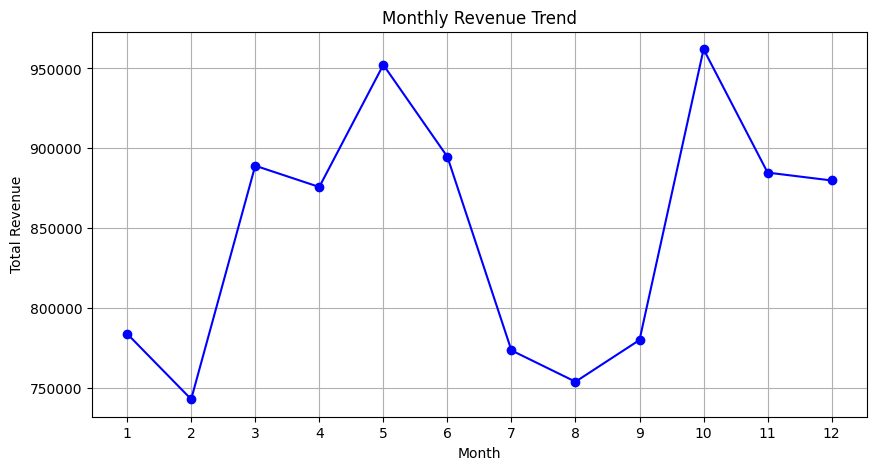

In [278]:
# Group data by month and analyse monthly revenue
df_filtered['pickup_month'] = pd.to_datetime(df_filtered['tpep_pickup_datetime']).dt.month
monthly_revenue = df_filtered.groupby('pickup_month')['total_amount'].sum().reset_index()
print(monthly_revenue)  # Print monthly_revenue

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

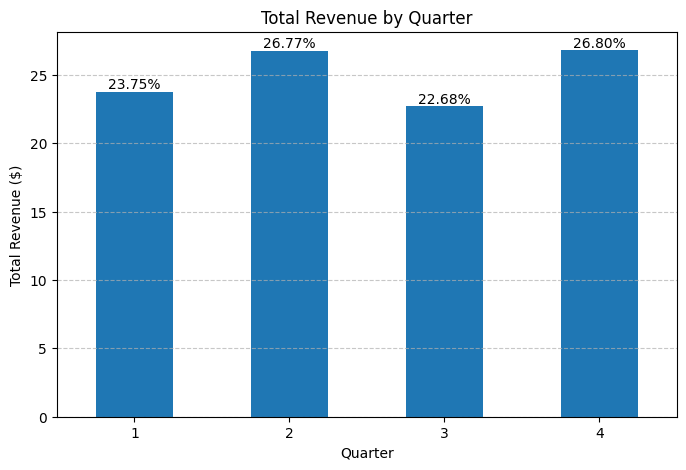

In [279]:
# Calculate proportion of each quarter
# Convert pickup datetime to datetime type (if not already)
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Extract the quarter
df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum total revenue
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum()

# Calculate revenue proportion
quarterly_revenue_percentage = (quarterly_revenue / quarterly_revenue.sum()) * 100

#Bar Chart - Revenue by Quarter
plt.figure(figsize=(8, 5))
quarterly_revenue_percentage.plot(kind='bar')
#plt.plot(quarterly_revenue.index, quarterly_revenue.values, marker='o', linestyle='-', color='b')
#Show percentage on the bars
for i, v in enumerate(quarterly_revenue_percentage.values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom') 
plt.title("Total Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

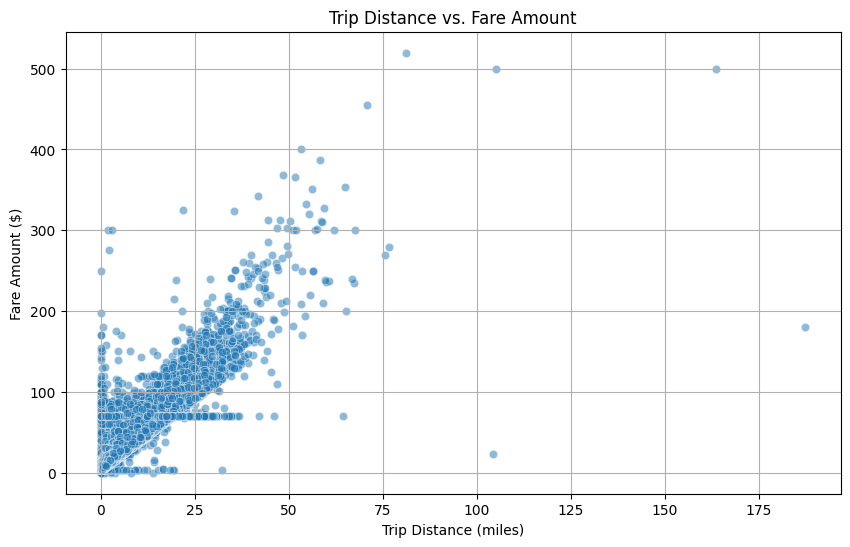

In [280]:
df_filtered = df_filtered[df_filtered['trip_distance'] > 0]

# Scatterplot - Trip Distance vs. Fare Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

In [281]:
df_filtered.describe()

Unnamed: 0       VendorID           tpep_pickup_datetime  \
count  3.541350e+05  354135.000000                         354135   
mean   1.550593e+06       1.754478  2023-07-01 22:53:54.675208704   
min    8.000000e+00       1.000000            2023-01-01 00:04:34   
25%    7.701480e+05       2.000000            2023-04-01 22:06:01   
50%    1.540974e+06       2.000000            2023-06-26 09:21:50   
75%    2.311492e+06       2.000000     2023-10-05 21:51:03.500000   
max    3.411775e+06       2.000000            2023-12-31 23:54:03   
std    9.058749e+05       0.430397                            NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    354135.000000  354135.000000  354135.000000  354135.000000   
mean          1.391876       3.465196       1.061654     165.603838   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.080000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.380000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.883248       4.536663       0.327943      63.500131   

        DOLocationID   payment_type    fare_amount  ...     tip_amount  \
count  354135.000000  354135.000000  354135.000000  ...  354135.000000   
mean      164.352349       1.199280      19.544157  ...       3.600377   
min         1.000000       1.000000       0.010000  ...       0.000000   
25%       114.000000       1.000000       9.300000  ...       1.000000   
50%       162.000000       1.000000      13.500000  ...       2.880000   
75%       234.000000       1.000000      21.900000  ...       4.480000   
max       265.000000       4.000000     519.600000  ...     150.290000   
std        69.629016       0.455409      17.795866  ...       3.988706   

        tolls_amount  improvement_surcharge   total_amount  \
count  354135.000000          354135.000000  354135.000000   
mean        0.585271               0.999696      28.725607   
min         0.000000               0.000000       1.010000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.600000   
max        86.000000               1.000000     535.750000   
std         2.145966               0.014747      22.490511   

       congestion_surcharge    airport_fee           hour    pickup_hour  \
count         354135.000000  354135.000000  354135.000000  354135.000000   
mean               2.336009       0.143478      14.334183      14.334183   
min                0.000000       0.000000       0.000000       0.000000   
25%                2.500000       0.000000      11.000000      11.000000   
50%                2.500000       0.000000      15.000000      15.000000   
75%                2.500000       0.000000      19.000000      19.000000   
max                2.500000       1.750000      23.000000      23.000000   
std                0.618939       0.465524       5.779812       5.779812   

        pickup_month        quarter  
count  354135.000000  354135.000000  
mean        6.511816       2.503864  
min         1.000000       1.000000  
25%         4.000000       2.000000  
50%         6.000000       2.000000  
75%        10.000000       4.000000  
max        12.000000       4.000000  
std         3.463499       1.128223  

[8 rows x 22 columns]

Correlation between fare and trip distance:
                fare_amount  trip_distance
fare_amount       1.000000       0.945404
trip_distance     0.945404       1.000000


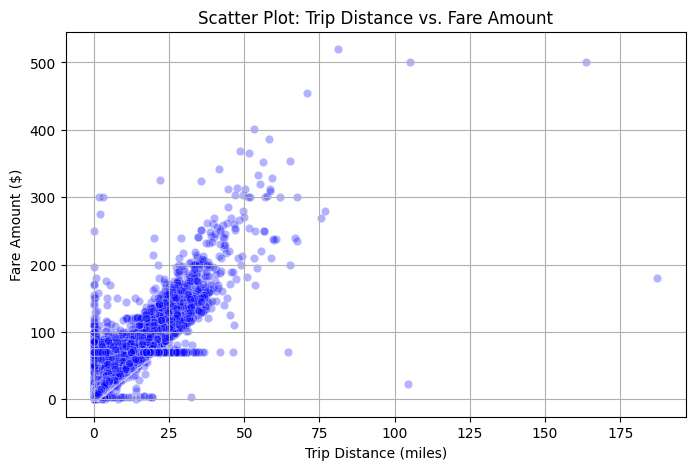

In [282]:
# Show how trip fare is affected by distance
# Remove trips with zero distance
df_filtered = df_filtered[df_filtered['trip_distance'] > 0]

# Compute correlation
correlation = df_filtered[['fare_amount', 'trip_distance']].corr()
print("Correlation between fare and trip distance:\n", correlation)

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['fare_amount'], alpha=0.3, color='blue')

# Customize the plot
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Scatter Plot: Trip Distance vs. Fare Amount")
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation Matrix:
               fare_amount  trip_duration
fare_amount       1.000000       0.274166
trip_duration     0.274166       1.000000


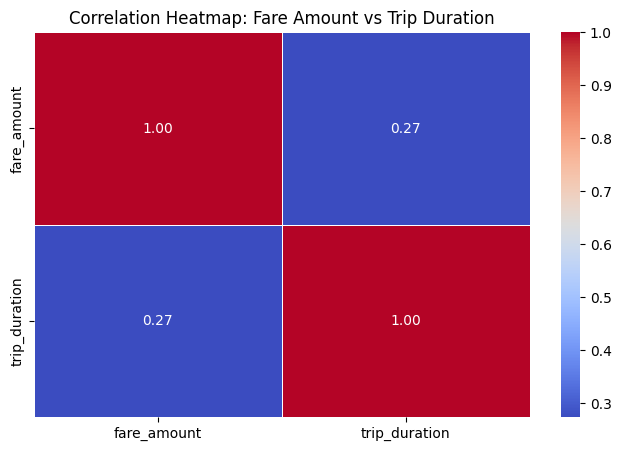

In [283]:
# Show relationship between fare and trip duration
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60  

# Remove negative or zero durations (data errors)
df_filtered = df_filtered[df_filtered['trip_duration'] > 0]

# Compute correlation
correlation = df_filtered[['fare_amount', 'trip_duration']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation)

# Plot scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.heatmap(df_filtered[['fare_amount', 'trip_duration']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap: Fare Amount vs Trip Duration")
plt.show()



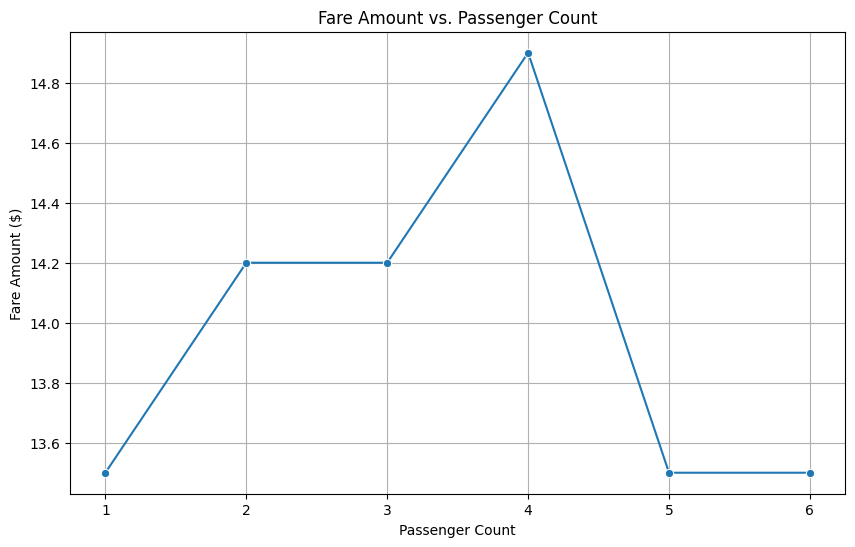

In [284]:
# Show relationship between fare and number of passengers
# Remove outliers (optional)
df_filtered = df_filtered[(df_filtered['fare_amount'] > 0) & (df_filtered['passenger_count'] > 0)]

median_fare = df_filtered.groupby('passenger_count')['fare_amount'].median().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='fare_amount', data=median_fare, marker='o')
plt.title("Fare Amount vs. Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


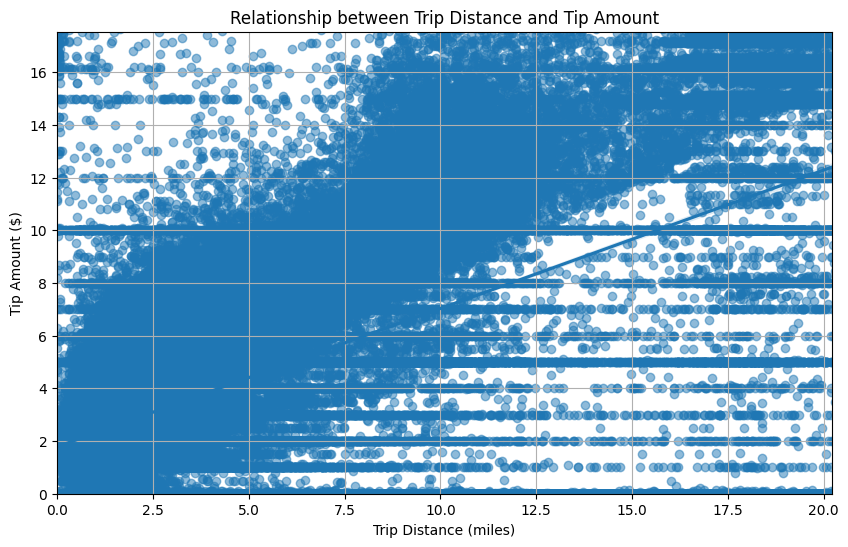

In [285]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='tip_amount', data=df_filtered, scatter_kws={'alpha':0.5})
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.grid(True)

# Removing extreme outliers for better visualization
plt.ylim(0, df_filtered['tip_amount'].quantile(0.99))
plt.xlim(0, df_filtered['trip_distance'].quantile(0.99))

plt.show()



In [286]:
df_filtered['payment_type']

0         2
1         1
2         2
3         2
4         1
         ..
354130    1
354131    2
354132    1
354133    2
354134    1
Name: payment_type, Length: 354111, dtype: int64

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

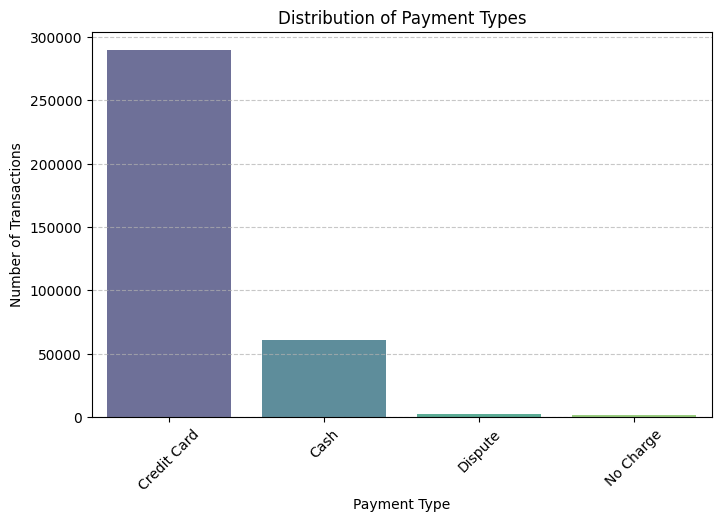

In [287]:
# Analyse the distribution of different payment types (payment_type).

# Define payment type mapping
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Replace numeric codes with labels
df_filtered['payment_type'] = df_filtered['payment_type'].map(payment_mapping)

# Count occurrences of each payment type
payment_counts = df_filtered['payment_type'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis", alpha=0.8)
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [213]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [288]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

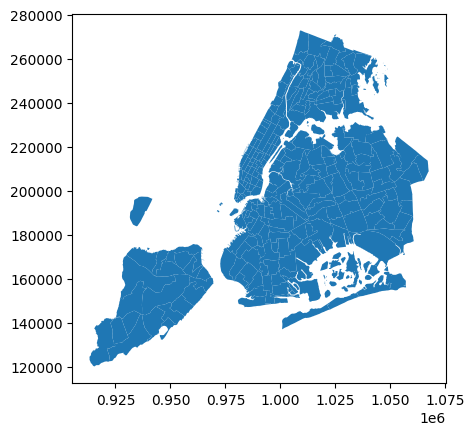

In [289]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [290]:
# Merge zones and trip records using locationID and PULocationID

df_filtered_merged = pd.merge(df_filtered, zones, left_on='PULocationID', right_on='LocationID')

df_filtered_merged



Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1             1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2              819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3             3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4             4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   
...            ...       ...                  ...                   ...   
350980     2702653         1  2023-09-30 23:18:16   2023-09-30 23:26:43   
350981     2705762         2  2023-09-30 23:39:11   2023-10-01 00:05:50   
350982     2703072         2  2023-09-30 23:25:31   2023-09-30 23:48:50   
350983     2702635         2  2023-09-30 23:54:53   2023-10-01 00:08:11   
350984     2702382         1  2023-09-30 23:36:14   2023-09-30 23:40:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           7.74         1.0                  N   
1                   2.0           1.24         1.0                  N   
2                   3.0           1.44         1.0                  N   
3                   1.0           0.54         1.0                  N   
4                   2.0           7.10         1.0                  N   
...                 ...            ...         ...                ...   
350980              1.0           1.10         1.0                  N   
350981              2.0           3.36         1.0                  N   
350982              3.0           4.97         1.0                  N   
350983              4.0           2.34         1.0                  N   
350984              1.0           1.40         1.0                  N   

        PULocationID  DOLocationID  ... pickup_month  quarter  trip_duration  \
0                138           256  ...            1        1      15.950000   
1                161           237  ...            1        1       5.083333   
2                237           141  ...            1        1      10.550000   
3                143           142  ...            1        1       5.416667   
4                246            37  ...            1        1      33.616667   
...              ...           ...  ...          ...      ...            ...   
350980           186           249  ...            9        3       8.450000   
350981            79           163  ...            9        3      26.650000   
350982           234           112  ...            9        3      23.316667   
350983           148           170  ...            9        3      13.300000   
350984           141           263  ...            9        3       4.300000   

        OBJECTID  Shape_Leng  Shape_Area                          zone  \
0            138    0.107467    0.000537             LaGuardia Airport   
1            161    0.035804    0.000072                Midtown Center   
2            237    0.042213    0.000096         Upper East Side South   
3            143    0.054180    0.000151           Lincoln Square West   
4            246    0.069467    0.000281     West Chelsea/Hudson Yards   
...          ...         ...         ...                           ...   
350980       186    0.024696    0.000037  Penn Station/Madison Sq West   
350981        79    0.042625    0.000108                  East Village   
350982       234    0.036072    0.000073                      Union Sq   
350983       148    0.039131    0.000070               Lower East Side   
350984       141    0.041514    0.000077               Lenox Hill West   

        LocationID    borough  \
0              138     Queens   
1              161  Manhattan   
2              237  Manhattan   
3              143  Manhattan   
4              246  Manhattan   
...            ...        ...   
350980         186  Manhattan   
350981          79  Manhattan   
350982         234  Manhattan   
350983         148  Manhattan   
350984         14

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [303]:
# Group data by location and calculate the number of trips

location_trip_counts = df_filtered_merged.groupby(['LocationID']).size().reset_index(name='trip_count')
print(location_trip_counts)



     LocationID  trip_count
0             1           8
1             4         338
2             6           4
3             7         131
4             9           2
..          ...         ...
193         258           1
194         260          54
195         261        1845
196         262        4533
197         263        6800

[198 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [304]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trip_count = zones.merge(location_trip_counts, on='LocationID', how='left')
zones_with_trip_count


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trip_count  
0           8.0  
1           NaN  
2           NaN  
3         338.0  
4           NaN  
..          ...  
258         NaN  
259        54.0  
260      1845.0  
261      4533.0  
262      6800.0  

[263 rows x 8 columns]

In [305]:
#Fill NaN values with 0 (for zones with no trips)
zones_with_trip_count['trip_count'].fillna(0, inplace=True)
zones_with_trip_count

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trip_count  
0           8.0  
1           0.0  
2           0.0  
3         338.0  
4           0.0  
..          ...  
258         0.0  
259        54.0  
260      1845.0  
261      4533.0  
262      6800.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

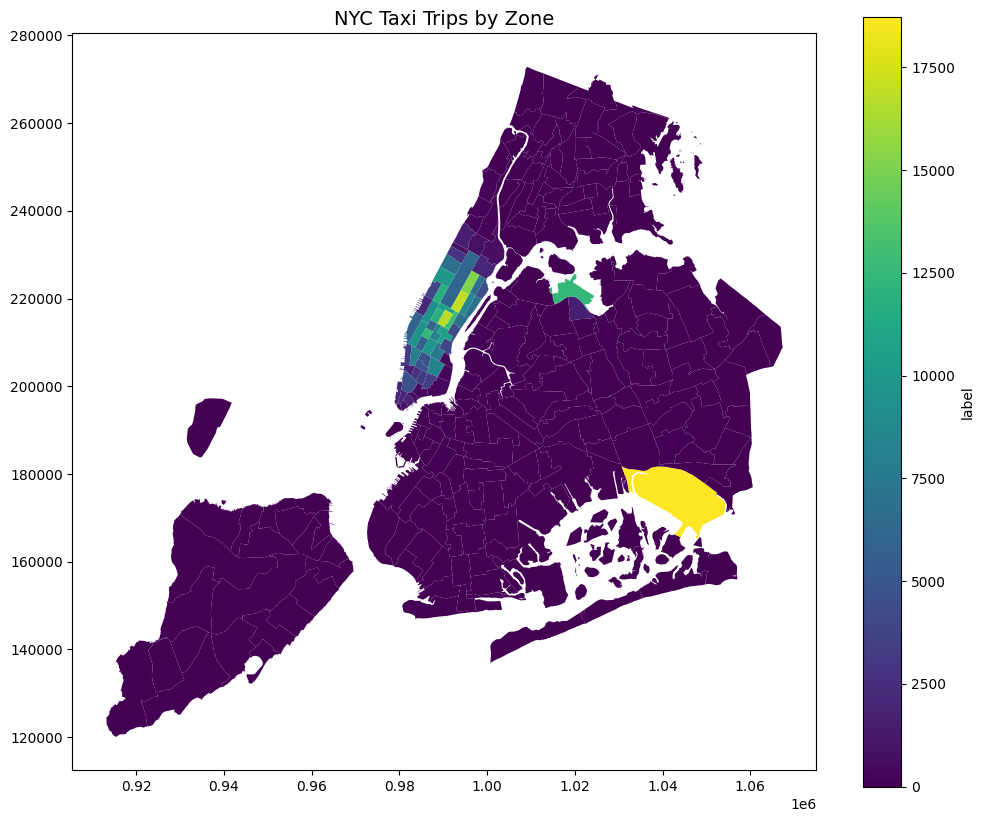

In [306]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trip_count.plot(column='trip_count', ax=ax, legend=True, 
              legend_kwds = {'label': "label", 'orientation': "vertical"})

ax.set_title("NYC Taxi Trips by Zone", fontsize=14)

plt.show()



In [307]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trip_count_sorted = zones_with_trip_count.sort_values(by="trip_count", ascending=False)
zones_with_trip_count_sorted

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
131       132    0.245479    0.002038              JFK Airport         132   
236       237    0.042213    0.000096    Upper East Side South         237   
160       161    0.035804    0.000072           Midtown Center         161   
235       236    0.044252    0.000103    Upper East Side North         236   
161       162    0.035270    0.000048             Midtown East         162   
..        ...         ...         ...                      ...         ...   
29         30    0.094510    0.000146            Broad Channel          30   
31         32    0.054267    0.000151                Bronxdale          32   
244       245    0.095983    0.000466            West Brighton         245   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
1           2    0.433470    0.004866              Jamaica Bay           2   

           borough                                           geometry  \
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
29          Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...   
31           Bronx  POLYGON ((1023302.25 251923.918, 1022481.96 25...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   

     trip_count  
131     18729.0  
236     16999.0  
160     16753.0  
235     15161.0  
161     12928.0  
..          ...  
29          0.0  
31          0.0  
244         0.0  
2           0.0  
1           0.0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

    pickup_hour  PULocationID  DOLocationID  avg_speed Route(PU -> DO)
0             0            88           144   0.074923       88 -> 144
1             1           238           249   0.196820      238 -> 249
2             2           255           256   0.141176      255 -> 256
3             3           148           238   0.253430      148 -> 238
4             4           230            51   0.717799       230 -> 51
5             5           230           230   0.365070      230 -> 230
6             6            70           138   0.085750       70 -> 138
7             7           128           128   0.115385      128 -> 128
8             8            50            43   0.059525        50 -> 43
9             9           142           232   0.285249      142 -> 232
10           10           231           209   2.040698      231 -> 209
11           11             1             1   0.307692          1 -> 1
12           12           229            45   0.241940       229 -> 45
13    

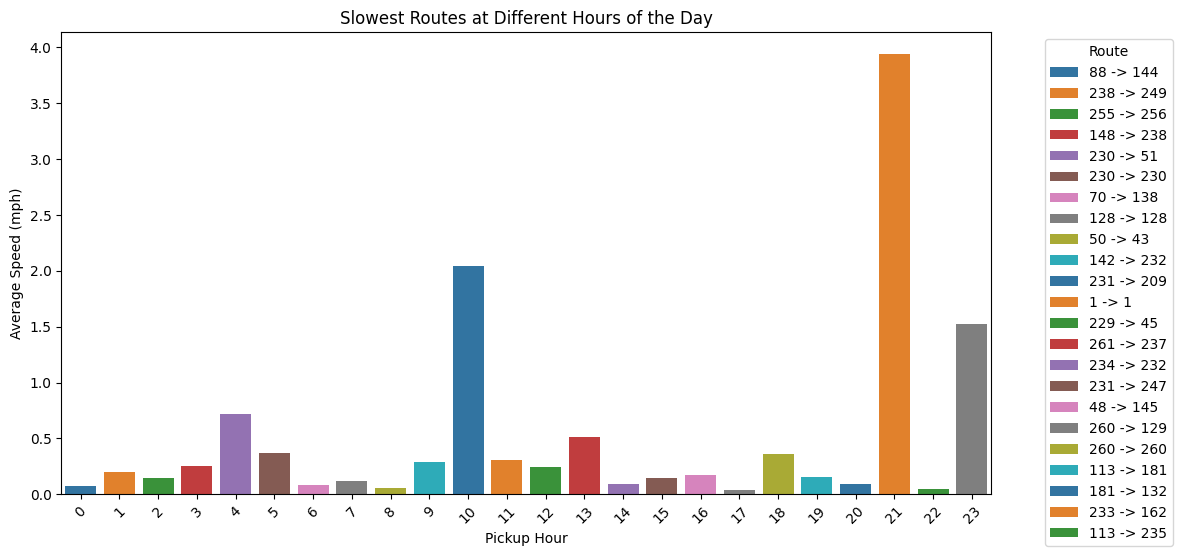

In [366]:
# Find routes which have the slowest speeds at different times of the day
df_filtered_merged['trip_duration'] = ( pd.to_datetime(df_filtered_merged['tpep_dropoff_datetime']) -  pd.to_datetime(df_filtered_merged['tpep_pickup_datetime'])).dt.total_seconds() / 3600

df_filtered_merged['speed'] = df_filtered_merged['trip_distance'] / df_filtered_merged['trip_duration']

df_filtered_merged['pickup_hour'] = pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.hour


slowest_routes = (df_filtered_merged.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])
                    .agg(avg_speed=('speed', 'mean'))
                    .reset_index()
                    .sort_values(by=['pickup_hour', 'avg_speed'], ascending=[True, True]))

slowest_routes['Route(PU -> DO)'] = slowest_routes['PULocationID'].astype(str) + ' -> ' + slowest_routes['DOLocationID'].astype(str)
slowest_routes_df = slowest_routes.groupby('pickup_hour').first().reset_index()
print(slowest_routes_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=slowest_routes_df["pickup_hour"], y=slowest_routes_df["avg_speed"], hue=slowest_routes_df["Route(PU -> DO)"], palette="tab10")

plt.xlabel("Pickup Hour")
plt.ylabel("Average Speed (mph)")
plt.title("Slowest Routes at Different Hours of the Day")
plt.xticks(rotation=45)
plt.legend(title="Route", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

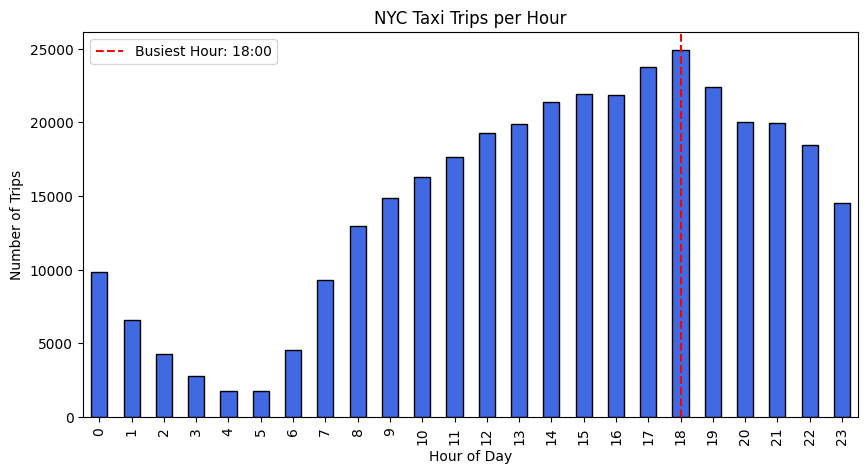

In [224]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_counts = df_filtered_merged.groupby('pickup_hour').size()

busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()

plt.figure(figsize=(10, 5))
hourly_trip_counts.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Trips per Hour")

plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.legend()

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

pickup_hour
18    2488700.0
17    2378700.0
19    2241100.0
15    2189100.0
16    2186700.0
dtype: float64


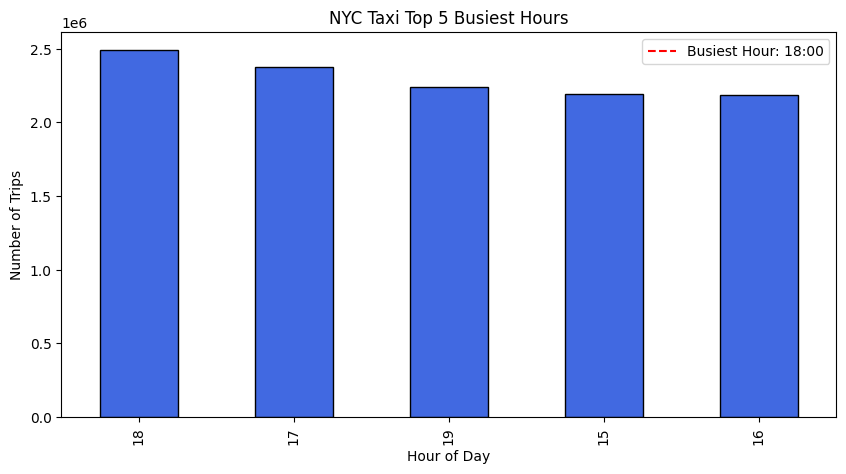

In [225]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_ratio = 0.01

hourly_trip_counts_actual = hourly_trip_counts/sampling_ratio

top_5_busiest_hours = hourly_trip_counts_actual.nlargest(5)

print(top_5_busiest_hours)

plt.figure(figsize=(10, 5))
top_5_busiest_hours.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Top 5 Busiest Hours")

plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.legend()

plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

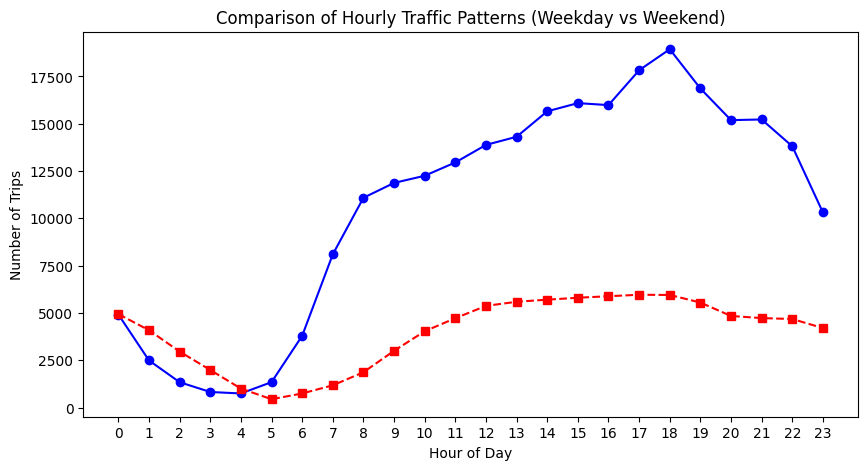

In [226]:
# Compare traffic trends for the week days and weekends
df_filtered_merged['day_of_week'] = pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.dayofweek
df_filtered_merged['is_weekend'] = df_filtered_merged['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_counts = df_filtered_merged.groupby(['pickup_hour', 'is_weekend']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts['Weekday'], marker='o', linestyle='-', label='Weekdays', color='blue')
plt.plot(hourly_counts.index, hourly_counts['Weekend'], marker='s', linestyle='--', label='Weekends', color='red')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Comparison of Hourly Traffic Patterns (Weekday vs Weekend)")
plt.xticks(range(24))
plt.show()



#What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

# 1. Finding busy hours will help us find below
    ## a. Dynamic Pricing - Increasing fares during paeak hours to increase revenue
    ## b. Cabs availability and allocation - More cabs in high demand areas during busy hours
    ## c. Driver Schedules - arrage driver shifts and login time accordingly
    ## d. Customer Satisfaction - Reducing wait times and customer complaints

# 2. Finding quiet hours will help us find below
    ## a. Offer discounts to attract more customers
    ## b. Save running and operations cost -  save fuel costs and company operatins & support during this time
    ## c. Driver schedule - suggest driver break times and shifts
    ## d. Explore ride sharing options during quiet hours

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

      DOLocationID  pickup_hour  trip_count
1179            68            0         260
1180            68            1         178
1181            68            2         126
1182            68            3          88
1183            68            4          43
...            ...          ...         ...
4348           239           19         725
4349           239           20         646
4350           239           21         637
4351           239           22         514
4352           239           23         369

[240 rows x 3 columns]
      PULocationID  pickup_hour  trip_count
1077           132            0         765
1078           132            1         341
1079           132            2         123
1080           132            3          70
1081           132            4          63
...            ...          ...         ...
2192           237           19        1053
2193           237           20         870
2194           237           21         910
2195    

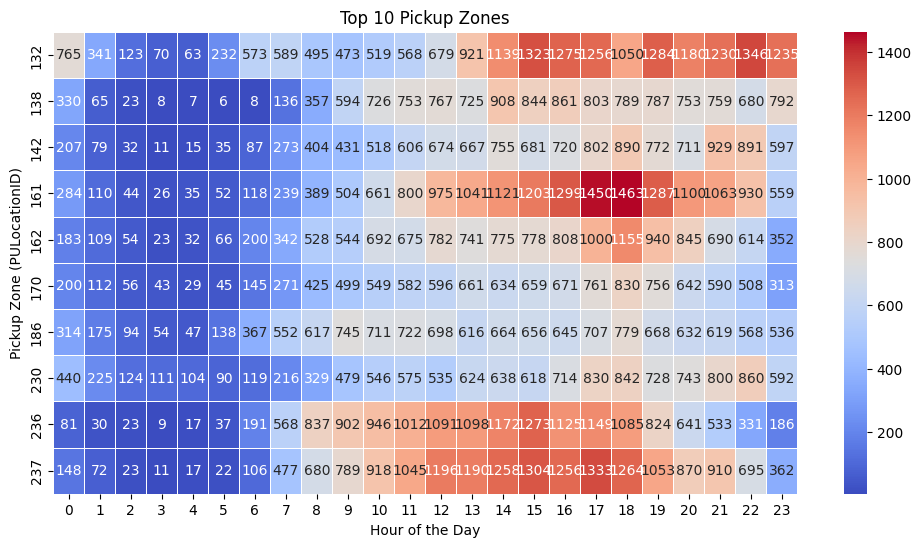

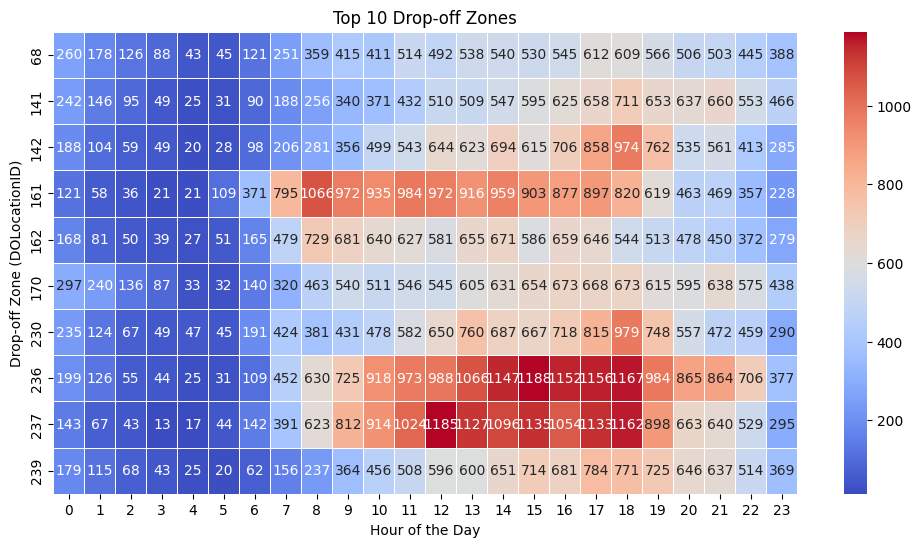

In [370]:
# Find top 10 pickup and dropoff zones
pickup_counts = df_filtered_merged.groupby(["PULocationID", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_pickup_zones = pickup_counts.groupby("PULocationID")["trip_count"].sum().nlargest(10).index
top_pickup_data = pickup_counts[pickup_counts["PULocationID"].isin(top_10_pickup_zones)]
dropoff_counts = df_filtered_merged.groupby(["DOLocationID", "pickup_hour"]).size().reset_index(name="trip_count")
top_10_dropoff_zones = dropoff_counts.groupby("DOLocationID")["trip_count"].sum().nlargest(10).index
top_dropoff_data = dropoff_counts[dropoff_counts["DOLocationID"].isin(top_10_dropoff_zones)]

print(top_dropoff_data)
print(top_pickup_data)

# Heatmap for pick-ups
pickup_heatmap_data = top_pickup_data.pivot(index="PULocationID", columns="pickup_hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(pickup_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Zone (PULocationID)")
plt.title("Top 10 Pickup Zones")
plt.show()

# Heatmap for drop-offs
dropoff_heatmap_data = top_dropoff_data.pivot(index="DOLocationID", columns="pickup_hour", values="trip_count")
plt.figure(figsize=(12, 6))
sns.heatmap(dropoff_heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Drop-off Zone (DOLocationID)")
plt.title("Top 10 Drop-off Zones")
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Pickup/Dropoff Ratios
     LocationID  Pickup_Dropoff_Ratio
68           70              9.278409
125         132              4.998399
131         138              2.972374
179         186              1.548241
41           43              1.400781
240         249              1.360204
107         114              1.356996
155         162              1.271065
154         161              1.199298
225         234              1.188141
Bottom 10 Pickup/Dropoff Ratios
    LocationID  Pickup_Dropoff_Ratio
1            3                   0.0
3            5                   0.0
6            8                   0.0
9           11                   0.0
13          15                   0.0
14          16                   0.0
19          21                   0.0
25          27                   0.0
28          30                   0.0
30          32                   0.0


<Figure size 1000x500 with 0 Axes>

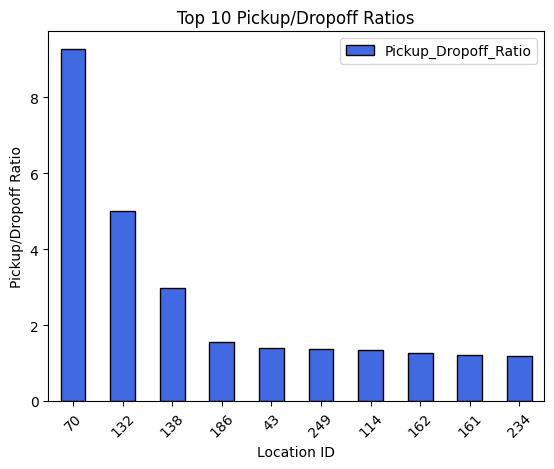

<Figure size 1000x500 with 0 Axes>

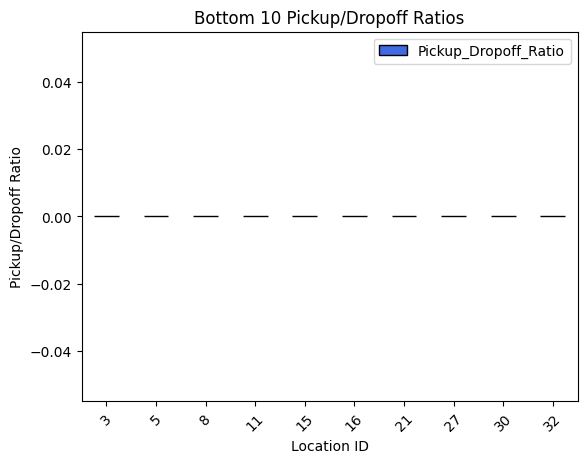

In [372]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df_filtered_merged['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']

dropoff_counts = df_filtered_merged['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']


location_stats = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

location_stats['Pickup_Dropoff_Ratio'] = location_stats['Pickup_Count'] / location_stats['Dropoff_Count']

top_10_ratios = location_stats.nlargest(10, 'Pickup_Dropoff_Ratio')
bottom_10_ratios = location_stats.nsmallest(10, 'Pickup_Dropoff_Ratio')

print("Top 10 Pickup/Dropoff Ratios")
print(top_10_ratios[['LocationID', 'Pickup_Dropoff_Ratio']])

print("Bottom 10 Pickup/Dropoff Ratios")
print(bottom_10_ratios[['LocationID', 'Pickup_Dropoff_Ratio']])

#Plot
plt.figure(figsize=(10, 5))

top_10_ratios.plot(kind='bar', x='LocationID', y='Pickup_Dropoff_Ratio', color='royalblue', edgecolor='black')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()

#Plot
plt.figure(figsize=(10, 5))

bottom_10_ratios.plot(kind='bar', x='LocationID', y='Pickup_Dropoff_Ratio', color='royalblue', edgecolor='black')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Night Pickup/Dropoff Ratios
     LocationID  Night_Pickup_Dropoff_Ratio
214         240                         inf
116         132                    8.419643
62           70                    6.576923
99          114                    3.396304
122         138                    3.309140
223         249                    2.769145
132         148                    2.210035
84           93                    2.000000
204         230                    1.967328
141         158                    1.890187
Bottom 10 Night Pickup/Dropoff Ratios
    LocationID  Night_Pickup_Dropoff_Ratio
0            1                         0.0
1            3                         0.0
3            5                         0.0
6            8                         0.0
7            9                         0.0
9           11                         0.0
12          14                         0.0
13          15                         0.0
14          16                         0.0
16          1

<Figure size 1000x500 with 0 Axes>

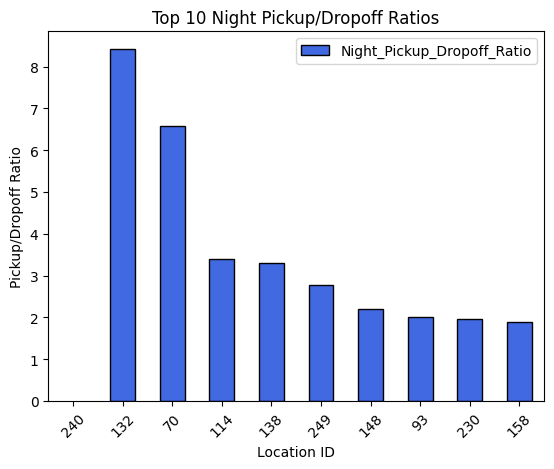

<Figure size 1000x500 with 0 Axes>

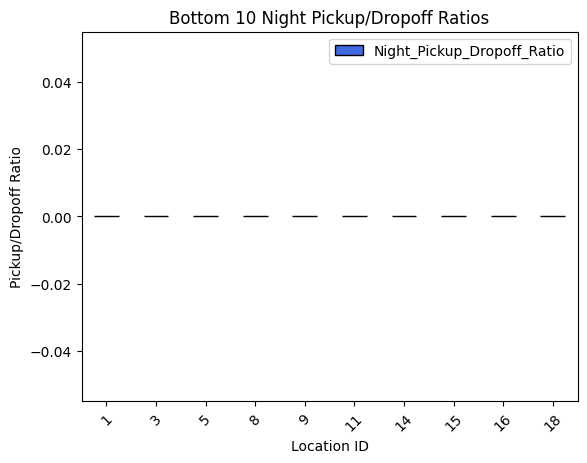

In [374]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_filtered_merged['pickup_hour'] =  pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.hour

df_night_11_to_5 = df_filtered_merged[(df_filtered_merged['pickup_hour'] >= 23) | (df_filtered_merged['pickup_hour'] <= 5)]

top_night_pickups = df_night_11_to_5['PULocationID'].value_counts().reset_index()
top_night_pickups.columns = ['LocationID', 'Night_Pickup_Count']

top_night_dropoffs = df_night_11_to_5['DOLocationID'].value_counts().reset_index()
top_night_dropoffs.columns = ['LocationID', 'Night_Dropoff_Count']

night_zone_traffic = pd.merge(top_night_pickups, top_night_dropoffs, on='LocationID', how='outer').fillna(0)

night_zone_traffic['Night_Pickup_Dropoff_Ratio'] = night_zone_traffic['Night_Pickup_Count'] / night_zone_traffic['Night_Dropoff_Count']

top_10_night_ratios = night_zone_traffic.nlargest(10, 'Night_Pickup_Dropoff_Ratio')
bottom_10_night_ratios = night_zone_traffic.nsmallest(10, 'Night_Pickup_Dropoff_Ratio')

print("Top 10 Night Pickup/Dropoff Ratios") 
print(top_10_night_ratios[['LocationID', 'Night_Pickup_Dropoff_Ratio']])

print("Bottom 10 Night Pickup/Dropoff Ratios")  
print(bottom_10_night_ratios[['LocationID', 'Night_Pickup_Dropoff_Ratio']])

#Plot
plt.figure(figsize=(10, 5))

top_10_night_ratios.plot(kind='bar', x='LocationID', y='Night_Pickup_Dropoff_Ratio', color='royalblue', edgecolor='black')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Night Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()

#Plot
plt.figure(figsize=(10, 5))

bottom_10_night_ratios.plot(kind='bar', x='LocationID', y='Night_Pickup_Dropoff_Ratio', color='royalblue', edgecolor='black')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Night Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share (11 PM - 5 AM): 12.08%
Daytime Revenue Share (6 AM - 10 PM): 87.92%


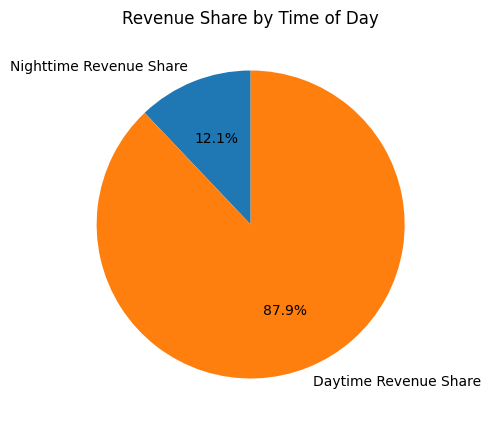

In [375]:
# Filter for night hours (11 PM to 5 AM)

night_revenue = df_filtered_merged[(df_filtered_merged['pickup_hour'] >= 23) | (df_filtered_merged['pickup_hour'] <= 5)]['total_amount'].sum()
day_revenue = df_filtered_merged[(df_filtered_merged['pickup_hour'] >= 6) & (df_filtered_merged['pickup_hour'] <= 22)]['total_amount'].sum()

total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")

#Plot pie chart
labels = ['Nighttime Revenue Share', 'Daytime Revenue Share']
sizes = [night_share, day_share]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Time of Day')
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

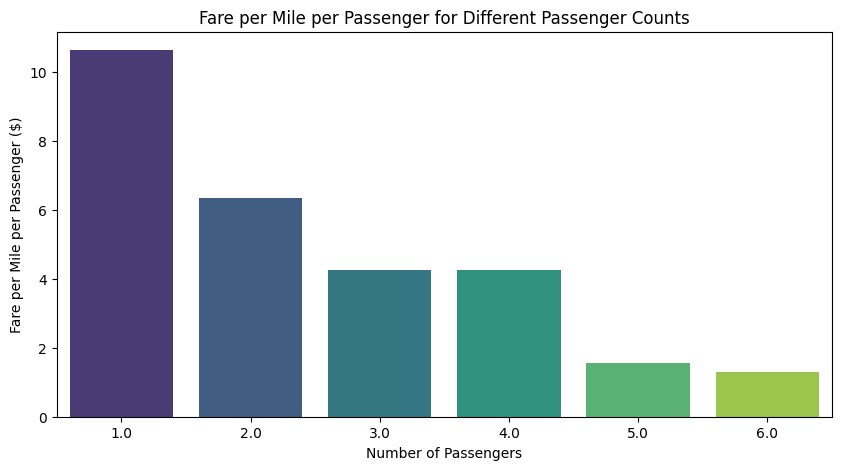

In [231]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered_merged = df_filtered_merged[df_filtered_merged['trip_distance'] > 0]
df_filtered_merged['fare_per_mile'] = df_filtered_merged['fare_amount'] / df_filtered_merged['trip_distance']
df_filtered_merged['fare_per_mile_per_passenger'] = df_filtered_merged['fare_per_mile'] / df_filtered_merged['passenger_count']

fare_analysis = df_filtered_merged.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=fare_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='viridis')
plt.xlabel("Number of Passengers")
plt.ylabel("Fare per Mile per Passenger ($)")
plt.title("Fare per Mile per Passenger for Different Passenger Counts")
plt.xticks(rotation=0)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

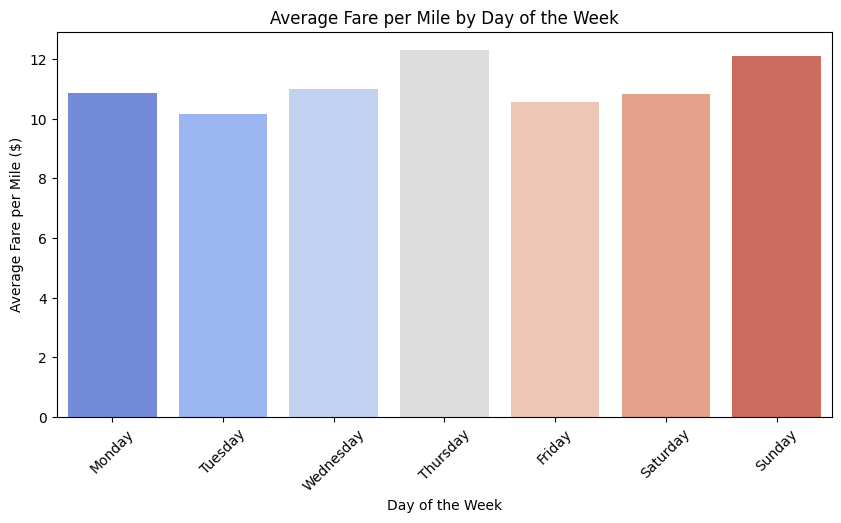

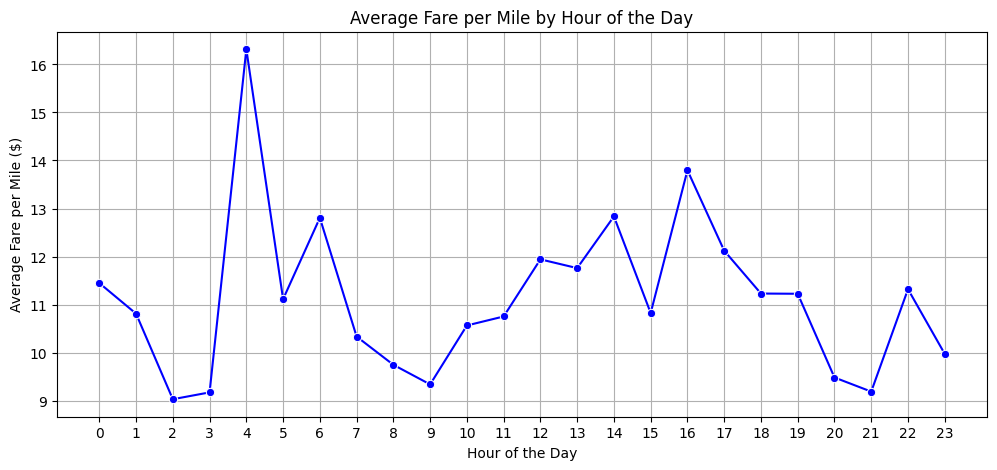

In [232]:
# Compare the average fare per mile for different days and for different times of the day
df_filtered_merged['day_of_week'] = pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.day_name()
df_filtered_merged['hour_of_day'] = pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.hour

fare_by_day = df_filtered_merged.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

fare_by_hour = df_filtered_merged.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='coolwarm', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=fare_by_hour, x='hour_of_day', y='fare_per_mile', marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

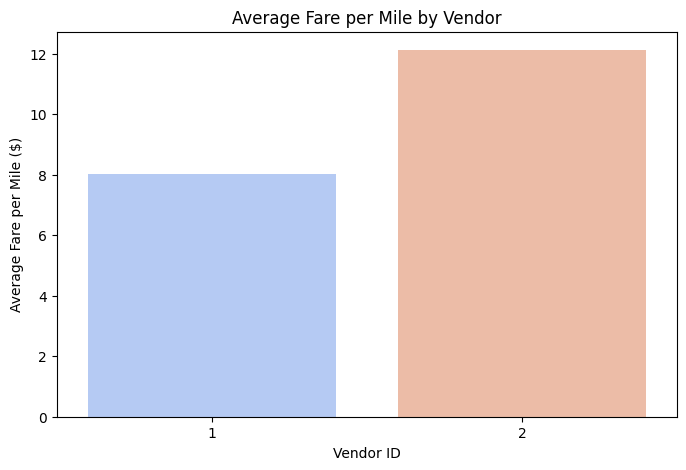

In [233]:
# Compare fare per mile for different vendors
fare_by_vendor = df_filtered_merged.groupby('VendorID')['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x='VendorID', y='fare_per_mile', palette='coolwarm')
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor")
plt.xticks(rotation=0)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


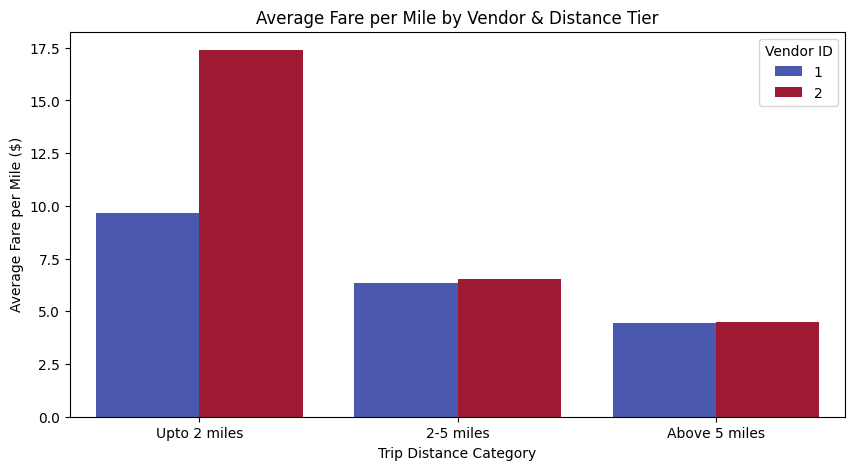

In [234]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')]
labels = ['Upto 2 miles', '2-5 miles', 'Above 5 miles']
df_filtered_merged['distance_category'] = pd.cut(df_filtered_merged['trip_distance'], bins=bins, labels=labels, right=True)
fare_by_vendor_distance = df_filtered_merged.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_vendor_distance, x='distance_category', y='fare_per_mile', hue='VendorID', palette='coolwarm')
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor & Distance Tier")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

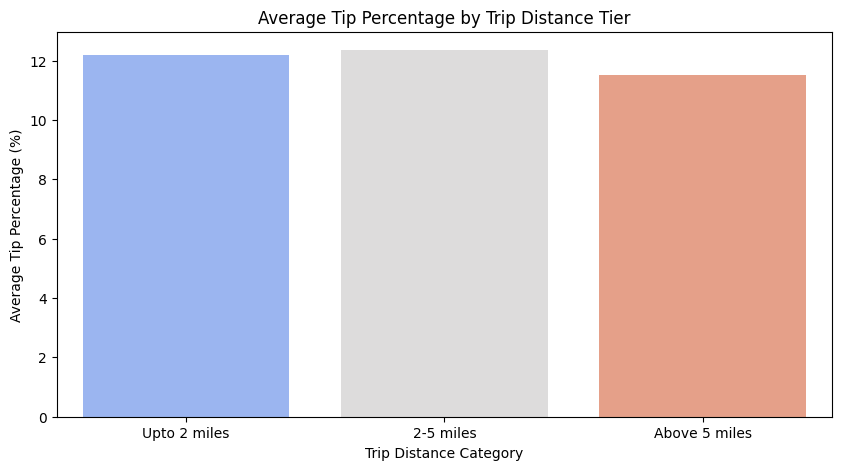

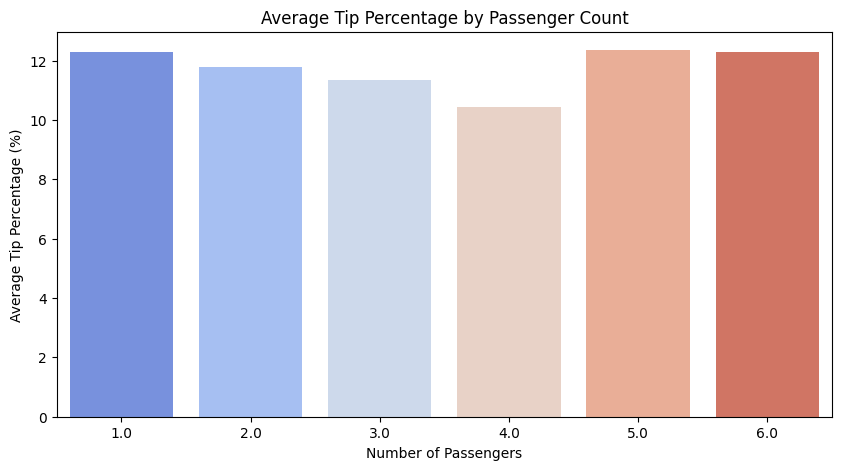

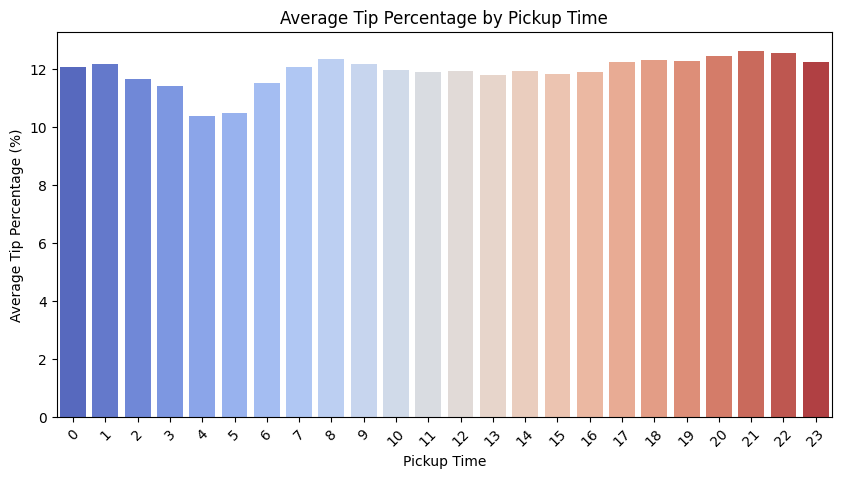

In [377]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered_merged['tip_percentage'] = (df_filtered_merged['tip_amount'] / df_filtered_merged['total_amount']) * 100

bins = [0, 2, 5, float('inf')]
labels = ['Upto 2 miles', '2-5 miles', 'Above 5 miles']
df_filtered_merged['distance_category'] = pd.cut(df_filtered_merged['trip_distance'], bins=bins, labels=labels, right=True)

tip_by_distance = df_filtered_merged.groupby('distance_category')['tip_percentage'].mean().reset_index()

tip_by_passenger = df_filtered_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()

tip_by_time = df_filtered_merged.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_distance, x='distance_category', y='tip_percentage', palette='coolwarm')
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Average Tip Percentage by Trip Distance Tier")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', palette='coolwarm') 
plt.xlabel("Number of Passengers")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Average Tip Percentage by Passenger Count")  
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_time, x='pickup_hour', y='tip_percentage', palette='coolwarm')
plt.xlabel("Pickup Time")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Average Tip Percentage by Pickup Time")
plt.xticks(rotation=45)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

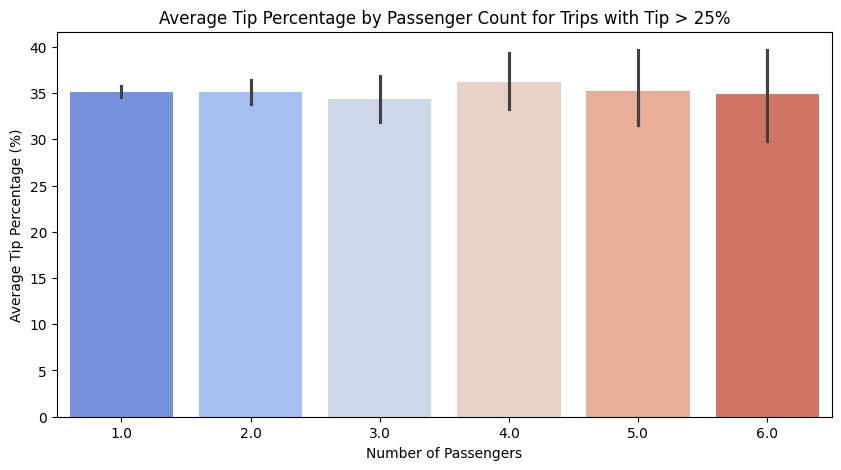

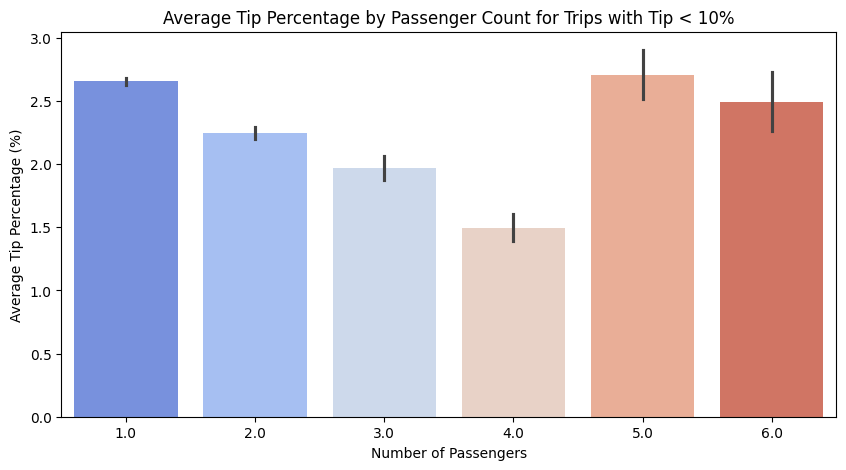

In [236]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_greater_than_25 = df_filtered_merged[df_filtered_merged['tip_percentage'] > 25]

tip_less_than_10 = df_filtered_merged[df_filtered_merged['tip_percentage'] < 10]

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_greater_than_25, x='passenger_count', y='tip_percentage', palette='coolwarm')
plt.xlabel("Number of Passengers")
plt.ylabel("Average Tip Percentage (%)")    
plt.title("Average Tip Percentage by Passenger Count for Trips with Tip > 25%")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=tip_less_than_10, x='passenger_count', y='tip_percentage', palette='coolwarm')
plt.xlabel("Number of Passengers")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Average Tip Percentage by Passenger Count for Trips with Tip < 10%")
plt.xticks(rotation=0)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

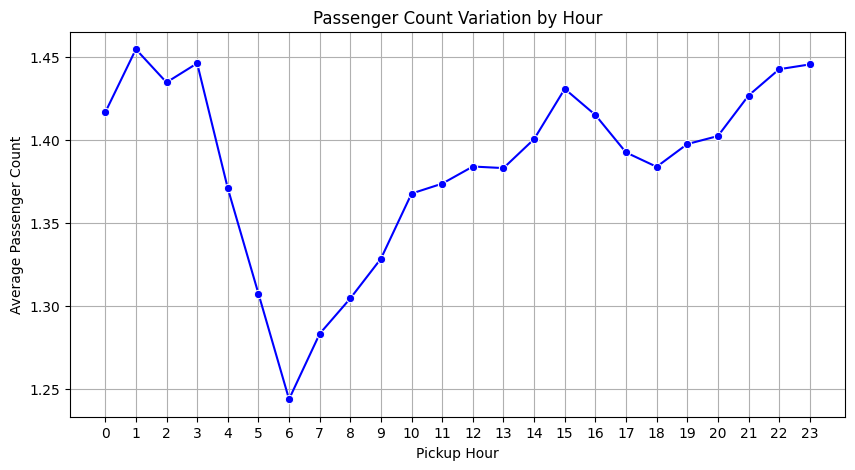

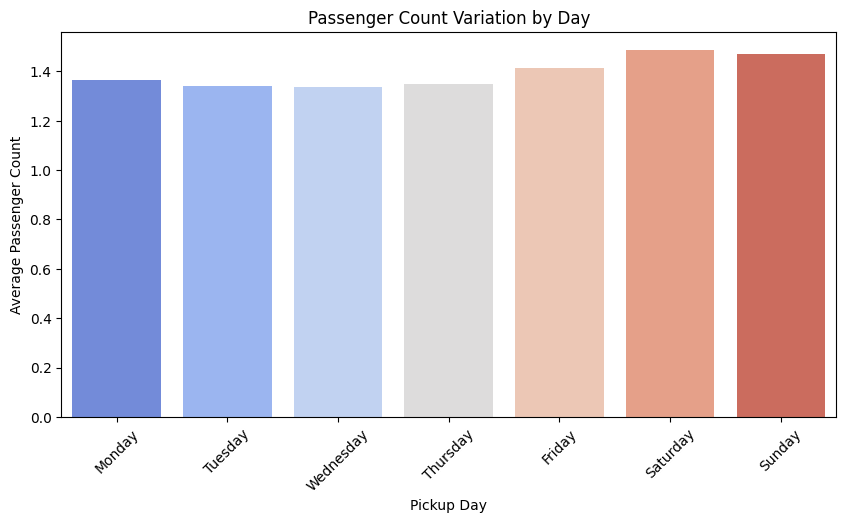

In [237]:
# See how passenger count varies across hours and days
df_filtered_merged['pickup_day'] = pd.to_datetime(df_filtered_merged['tpep_pickup_datetime']).dt.day_name()

hourly_passenger_count = df_filtered_merged.groupby('pickup_hour')['passenger_count'].mean().reset_index()

daily_passenger_count = df_filtered_merged.groupby('pickup_day')['passenger_count'].mean().reset_index()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day'] = pd.Categorical(daily_passenger_count['pickup_day'], categories=ordered_days, ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('pickup_day')

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', marker='o', color='b')
plt.xlabel("Pickup Hour")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count Variation by Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_passenger_count, x='pickup_day', y='passenger_count', palette='coolwarm')
plt.xlabel("Pickup Day")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count Variation by Day")
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

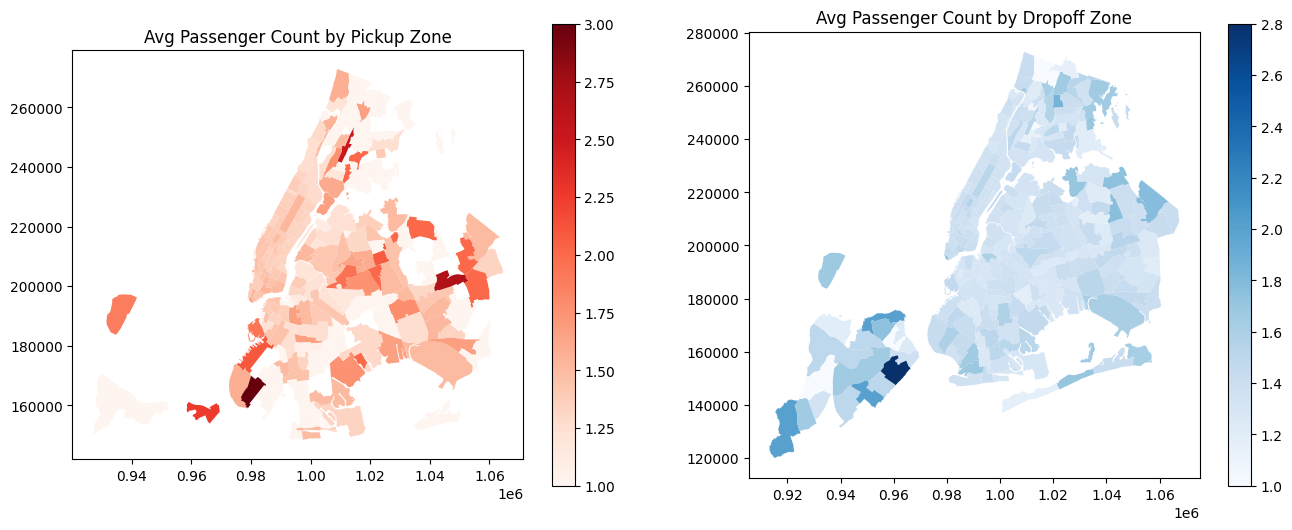

In [381]:
# How does passenger count vary across zones
pickup_passenger_count = df_filtered_merged.groupby("PULocationID")["passenger_count"].mean().reset_index()
dropoff_passenger_count = df_filtered_merged.groupby("DOLocationID")["passenger_count"].mean().reset_index()

# Renaming location id column names for better clarity in further steps
pickup_passenger_count.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count_pickup"}, inplace=True)
dropoff_passenger_count.rename(columns={"DOLocationID": "LocationID", "passenger_count": "avg_passenger_count_dropoff"}, inplace=True)

# Merging with Zones Data
zones_pickup = zones.merge(pickup_passenger_count, on="LocationID", how="left")
zones_dropoff = zones.merge(dropoff_passenger_count, on="LocationID", how="left")

# Bar charts of Top Zones
top_pickup_zones = pickup_passenger_count.nlargest(10, "avg_passenger_count_pickup")
top_dropoff_zones = dropoff_passenger_count.nlargest(10, "avg_passenger_count_dropoff")

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

zones_pickup.plot(column="avg_passenger_count_pickup", cmap="Reds", legend=True, ax=ax[0])
ax[0].set_title("Avg Passenger Count by Pickup Zone")

zones_dropoff.plot(column="avg_passenger_count_dropoff", cmap="Blues", legend=True, ax=ax[1])
ax[1].set_title("Avg Passenger Count by Dropoff Zone")

plt.show()



In [239]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

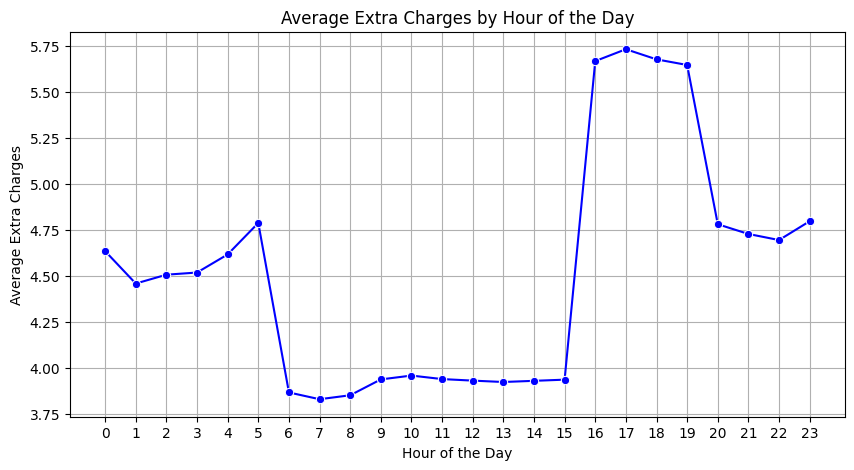

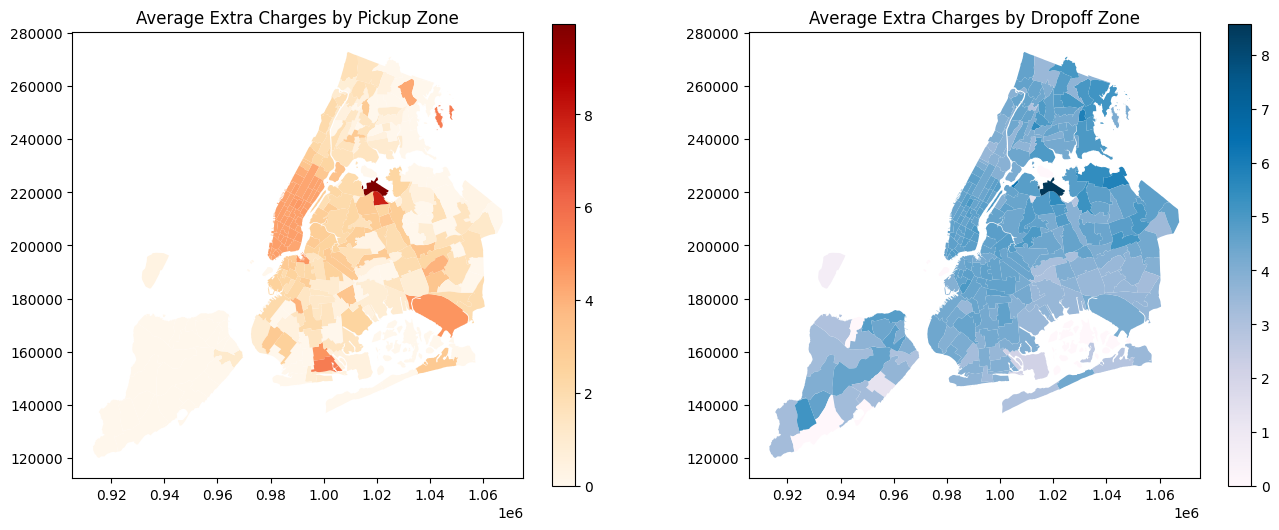

In [382]:
# How often is each surcharge applied?

df_filtered_merged["total_extra_charges"] = df_filtered_merged[["extra", "congestion_surcharge", "mta_tax", "airport_fee"]].sum(axis=1)

extra_by_pickup_zone = df_filtered_merged.groupby("PULocationID")["total_extra_charges"].mean().reset_index()
extra_by_pickup_zone.rename(columns={"PULocationID": "LocationID", "total_extra_charges": "avg_extra_pickup"}, inplace=True)

extra_by_dropoff_zone = df_filtered_merged.groupby("DOLocationID")["total_extra_charges"].mean().reset_index()
extra_by_dropoff_zone.rename(columns={"DOLocationID": "LocationID", "total_extra_charges": "avg_extra_dropoff"}, inplace=True)

zones_with_trips = zones.merge(extra_by_pickup_zone, on="LocationID", how="left")
zones_with_trips = zones_with_trips.merge(extra_by_dropoff_zone, on="LocationID", how="left")

zones_with_trips[["avg_extra_pickup", "avg_extra_dropoff"]] = zones_with_trips[["avg_extra_pickup", "avg_extra_dropoff"]].fillna(0)

extra_by_hour = df_filtered_merged.groupby("pickup_hour")["total_extra_charges"].mean().reset_index()

# Extra Charges by Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=extra_by_hour["pickup_hour"], y=extra_by_hour["total_extra_charges"], palette="magma", marker="o", color="b")
plt.title("Average Extra Charges by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Spatial Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

zones_with_trips.plot(column="avg_extra_pickup", cmap="OrRd", legend=True, ax=ax[0])
ax[0].set_title("Average Extra Charges by Pickup Zone")

zones_with_trips.plot(column="avg_extra_dropoff", cmap="PuBu", legend=True, ax=ax[1])
ax[1].set_title("Average Extra Charges by Dropoff Zone")

plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Weekend ride patterns remain steady throughout the day, while weekdays show sharp increases during morning and evening rush hours.
2. Daytime revenue is nearly 8 times higher than nighttime, highlighting significantly higher demand during the day.
3. Fare per mile per passenger is highest for solo riders and decreases as the number of passengers increases.
4. Fare per mile peaks at 4 AM, remaining relatively stable with minor fluctuations throughout the day.
5. The average fare per mile is generally consistent across all days but is highest on Thursdays and lowest on Fridays.
6. Vendor 1’s fare per mile follows a daily trend, whereas Vendor 2’s rates remain mostly flat, with a slight increase during the daytime.
7. For medium and long-distance trips, both vendors charge similar fares per mile. However, for short trips, Vendor 2 charges nearly twice as much as 8. Vendor 
8. Tipping behavior remains stable across different passenger counts and increases with trip distance, with no major differences between peak and off-peak hours.
9. Average passenger count per ride peaks at midnight, declines until 6 AM, and then gradually increases again.
10. Passenger count remains consistent on weekdays, indicating steady demand.
11. Extra charges peak between 4 PM and 8 PM, aligning with evening rush hours, and are lowest during the day.
12. The average extra charge is highest between 6 PM and 9 PM, likely due to peak-time surcharges.
13. The average congestion surcharge drops significantly between 4 AM and 6 AM, suggesting minimal traffic during early morning hours.
14. Both the MTA tax and improvement surcharge remain steady throughout the day, indicating consistent regulatory fees.
15. Airport fees peak at 11 PM, likely due to an increase in late-night airport trips.
16. Longer trips with higher fares tend to have lower tipping percentages (<10%), suggesting cost sensitivity influences tipping behavior.
17. Trips with fewer passengers show slightly higher tipping percentages (>25%), indicating that individuals or small groups are more generous.
18. Tipping remains consistent across peak and off-peak hours, showing that the time of day has little impact on tipping behavior.
19. Higher fares do not always result in higher tips, likely due to the perceived cost burden on passengers.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. High Demand zones - Maintain availability in major places like JFK Airport & Major Transit Hubs and zones 131, 160-161, and 235-236 throughout the day. 
2. Rush Hours - Focus cabs in residential areas early morning, then transition to office zones as the day progresses. 
3. Bigger Cabs - JFK Airport & Major Transit Hubs: Higher average passenger counts due to group travel.
4. Tourist Hotspots (May & October)- Deploy additional taxis near airports, train stations, and key landmarks to capitalize on seasonal traffic. 
5. Seasonal Adjustments - From July to September, there is drop in demand so we can reduce fleet and distribute cabs to other areas


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Peak Hour Allocation: Assign more taxis between 4 PM - 8 PM, especially in high demand zones (131, 160-161, and 235-236). 
2. Weekend vs. Weekday Approach: Maintain steady coverage on weekends as demand is consistent but allocate extra cabs in office-dense areas during weekday rush hours. 
3. Midnight Surge Handling: Increase fleet availability around midnight when passenger count peaks, ensuring quick service and reduced wait times. 
4. Dynamic Dispatching: Leverage real-time trip data to reposition idle taxis dynamically in zones showing increasing demand. 
5. Nighttime Optimization: Since nighttime revenue is significantly lower, consider alternative incentives or partnerships for drivers to stay active. 
6. Dynamic Fare Structuring: Adjust fares based on time-of-day demand, increasing rates during peak hours while offering slight discounts during low-demand periods 
